<a href="https://colab.research.google.com/github/fidanfatih/Pycoders_Capstone/blob/main/Pycoders_AutoScout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
    ** In this notebook, We will make EDA in 3 stages.**

    . Part-1 : Data Cleansing. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns
    
    . Part-2 : Filling Columns. It deals with Missing Values. Categorical to numeric transformation will be done.

    . Part-3 : Outliers and Final review 

## Import Libraries and Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [ ]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AutoScout24/autoscout_data_2000.csv')
df = data.copy()
df.shape

(71104, 49)

## METHODS


In [ ]:
def show_nans(df, limit):
    missing = df.isnull().sum()*100/df.shape[0]
    return missing.loc[lambda x : x >= limit]

def perc_nans(serial):
    # display percentage of nans in a Series
    return serial.isnull().sum()/serial.shape[0]*100

## Check Data

In [ ]:
df.head(2)

,location,url,make,model,short_description,price,mileage,gearbox,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty,Mileage,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Power,Gearbox,engine_size,gears,cylinders,empty_weight,Fuel_type,fuel_consumption,co2_emissions,emission_class,emissions_sticker,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,extras,\ncolour,\nmanufacturer_color,\npaint,upholstery_colour,upholstery
0,"LOON OP ZAND, NL",https://www.autoscout24.com/offers/audi-a3-2-0...,"\n,Audi ,\n","\n,A3,\n",2.0 FSI Ambition Pro Line,"[['\n', '€ 4,450.-', '\n']]","['', ['191,066 km']]","\n,Automatic,\n",08/2003,"\n,Gasoline,\n","110 kW (150 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n5,\n3,"Country version,None",\nSJ-112-R,"\n,6 months,\n","[['\n'], ['']]",08/2003,None,05/2022,None,"\n,Yes,\n","\n,None,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,110 kW (150 hp),\n","\n,Automatic,\n","\n,1,984 cc,\n","\n,None,\n","\n,4,\n","\n,1,280 kg,\n","\n,Super 95,\n","\n,None,\n","['\n', [' ', ' ', ' '], '\n']","\n,Euro 4,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'Radio']]","[['ABS', 'Alarm system', 'Central door lock', ...",[['Alloy wheels']],"\n4, Grey",None,"\npaint, Metallic","\nupholstery, Black","\n8, Cloth"
1,"HEERLEN, NL",https://www.autoscout24.com/offers/audi-a3-spo...,"\n,Audi ,\n","\n,A3,\n",Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,"[['\n', '€ 12,950.-', '\n']]","['', ['94,758 km']]","\n,Automatic,\n",10/2013,"\n,Gasoline,\n","92 kW (125 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n5,\n5,"Country version,None",\n809725,"\n,None,\n","[['\n'], ['']]",10/2013,None,None,None,"\n,Yes,\n","\n,None,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,92 kW (125 hp),\n","\n,Automatic,\n","\n,1,395 cc,\n","\n,None,\n","\n,4,\n","\n,1,200 kg,\n","\n,Gasoline,\n","['\n', ['4.9 l/100 km (comb.)', ' ', ' '], '\n']","\n,None,\n","\n,None,\n","\n,None,\n","[['Air conditioning', 'Automatic climate contr...","[['CD player', 'Radio']]","[['Alarm system', 'Central door lock', 'Centra...","[['Alloy wheels (16"")']]","\n4, White",None,None,"\nupholstery, Black","\n8, Cloth"


In [ ]:
df = df.replace("None",np.nan)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71104 entries, 0 to 71103
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 71104 non-null  object 
 1   url                      71104 non-null  object 
 2   make                     71104 non-null  object 
 3   model                    71104 non-null  object 
 4   short_description        70935 non-null  object 
 5   price                    71104 non-null  object 
 6   mileage                  71104 non-null  object 
 7   gearbox                  71104 non-null  object 
 8   registration             71064 non-null  object 
 9   fuel_type                71104 non-null  object 
 10  power                    71104 non-null  object 
 11  seller                   71104 non-null  object 
 12  body_type                71104 non-null  object 
 13  type                     71104 non-null  object 
 14  drivetrain            

In [ ]:
df.columns

Index(['location', 'url', 'make', 'model', 'short_description', 'price',
       'mileage', 'gearbox', 'registration', 'fuel_type', 'power', 'seller',
       'body_type', 'type', 'drivetrain', 'seats', 'doors', 'country_version',
       'offer_number', 'warranty', 'Mileage', 'first_registration',
       'production_date', 'general_inspection', 'last_service',
       'full_service_history', 'non_smoker_vehicle', 'previous_owner',
       'last_timing_belt_change', 'Power', 'Gearbox', 'engine_size', 'gears',
       'cylinders', 'empty_weight', 'Fuel_type', 'fuel_consumption',
       'co2_emissions', 'emission_class', 'emissions_sticker',
       '\nComfort & Convenience\n', '\nEntertainment & Media\n',
       '\nSafety & Security\n', 'extras', '\ncolour', '\nmanufacturer_color',
       '\npaint', ' upholstery_colour ', ' upholstery '],
      dtype='object')

In [ ]:
print(*df.columns,sep='\n')

location
url
make
model
short_description
price
mileage
gearbox
registration
fuel_type
power
seller
body_type
type
drivetrain
seats
doors
country_version
offer_number
warranty
Mileage
first_registration
production_date
general_inspection
last_service
full_service_history
non_smoker_vehicle
previous_owner
last_timing_belt_change
Power
Gearbox
engine_size
gears
cylinders
empty_weight
Fuel_type
fuel_consumption
co2_emissions
emission_class
emissions_sticker

Comfort & Convenience


Entertainment & Media


Safety & Security

extras

colour

manufacturer_color

paint
 upholstery_colour 
 upholstery 


In [ ]:
df.isnull().sum()

location                         0
url                              0
make                             0
model                            0
short_description              169
price                            0
mileage                          0
gearbox                          0
registration                    40
fuel_type                        0
power                            0
seller                           0
body_type                        0
type                             0
drivetrain                       0
seats                            0
doors                            0
country_version                  0
offer_number                     0
warranty                         0
Mileage                          0
first_registration              40
production_date              63688
general_inspection           17024
last_service                 71104
full_service_history             0
non_smoker_vehicle               0
previous_owner                   0
last_timing_belt_cha

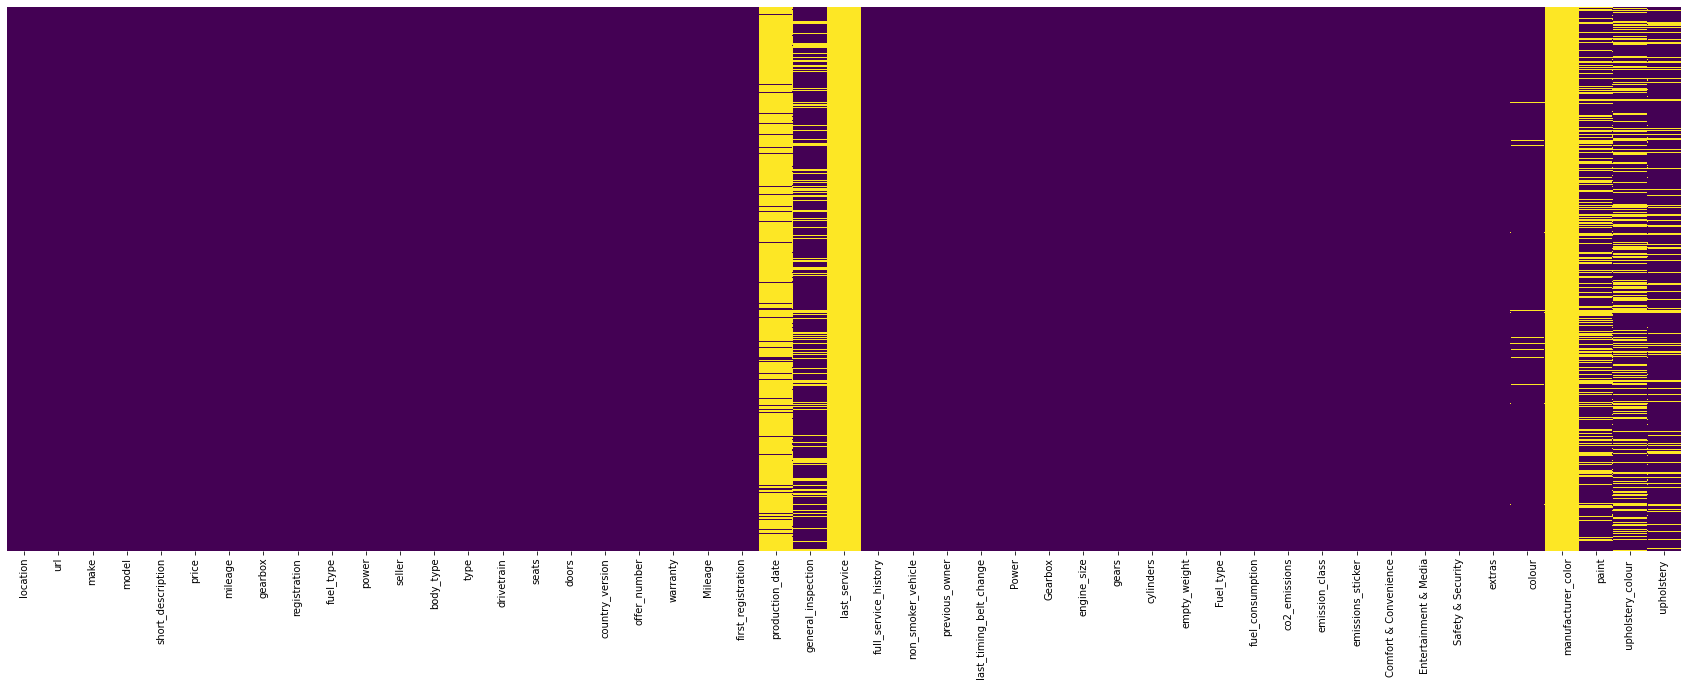

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [ ]:
show_nans(df,0)

location                       0.000000
url                            0.000000
make                           0.000000
model                          0.000000
short_description              0.237680
price                          0.000000
mileage                        0.000000
gearbox                        0.000000
registration                   0.056256
fuel_type                      0.000000
power                          0.000000
seller                         0.000000
body_type                      0.000000
type                           0.000000
drivetrain                     0.000000
seats                          0.000000
doors                          0.000000
country_version                0.000000
offer_number                   0.000000
warranty                       0.000000
Mileage                        0.000000
first_registration             0.056256
production_date               89.570207
general_inspection            23.942394
last_service                 100.000000


In [ ]:
df.head(1)

,location,url,make,model,short_description,price,mileage,gearbox,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty,Mileage,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Power,Gearbox,engine_size,gears,cylinders,empty_weight,Fuel_type,fuel_consumption,co2_emissions,emission_class,emissions_sticker,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,extras,\ncolour,\nmanufacturer_color,\npaint,upholstery_colour,upholstery
0,"LOON OP ZAND, NL",https://www.autoscout24.com/offers/audi-a3-2-0...,"\n,Audi ,\n","\n,A3,\n",2.0 FSI Ambition Pro Line,"[['\n', '€ 4,450.-', '\n']]","['', ['191,066 km']]","\n,Automatic,\n",08/2003,"\n,Gasoline,\n","110 kW (150 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n5,\n3,"Country version,None",\nSJ-112-R,"\n,6 months,\n","[['\n'], ['']]",08/2003,NaN,05/2022,NaN,"\n,Yes,\n","\n,None,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,110 kW (150 hp),\n","\n,Automatic,\n","\n,1,984 cc,\n","\n,None,\n","\n,4,\n","\n,1,280 kg,\n","\n,Super 95,\n","\n,None,\n","['\n', [' ', ' ', ' '], '\n']","\n,Euro 4,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'Radio']]","[['ABS', 'Alarm system', 'Central door lock', ...",[['Alloy wheels']],"\n4, Grey",NaN,"\npaint, Metallic","\nupholstery, Black","\n8, Cloth"


> Drop columns that have %65 precentage and higher of missing values.

In [ ]:
drop_columns=[
              # 'location', 
              'url', # useless
              # 'make', 
              # 'model', 
              'short_description', # complicated data ---------------------->
              # 'price',
              # 'mileage', 
              # 'gearbox', 
              # 'registration', 
              # 'fuel_type', 
              # 'power', 
              # 'seller',
              # 'body_type', 
              # 'type', 
              # 'drivetrain', 
              # 'seats', 
              # 'doors', 
              'country_version', # useless
              'offer_number', # useless
              # 'warranty', 
              'Mileage', # useless
              # 'first_registration',
              'production_date', # null
              # 'general_inspection', 
              'last_service', #null
              # 'full_service_history', 
              # 'non_smoker_vehicle', 
              # 'previous_owner'
              # 'last_timing_belt_change '
              'Power', # dublicate column
              'Gearbox', # dublicate column
              # 'engine_size', 
              # 'gears', 
              # 'cylinders', 
              # 'empty_weight', 
              'Fuel_type',# dublicate column
              # 'fuel_consumption', 
              # 'co2_emissions', 
              # 'emission_class',
              # '\nComfort & Convenience\n', 
              # '\nEntertainment & Media\n',
              # '\nSafety & Security\n',
              # 'extras', 
              # '\ncolour', # dublicate column
              '\nmanufacturer_color', # null
              # '\npaint',
              # ' upholstery_colour ',
              # ' upholstery ',
]
df.drop(drop_columns, axis = 1, inplace = True)

In [ ]:
df.shape

(71104, 38)

## Percentages of Null Data

In [ ]:
show_nans(df,0)

location                      0.000000
make                          0.000000
model                         0.000000
price                         0.000000
mileage                       0.000000
gearbox                       0.000000
registration                  0.056256
fuel_type                     0.000000
power                         0.000000
seller                        0.000000
body_type                     0.000000
type                          0.000000
drivetrain                    0.000000
seats                         0.000000
doors                         0.000000
warranty                      0.000000
first_registration            0.056256
general_inspection           23.942394
full_service_history          0.000000
non_smoker_vehicle            0.000000
previous_owner                0.000000
last_timing_belt_change       0.000000
engine_size                   0.000000
gears                         0.000000
cylinders                     0.000000
empty_weight             

\> At the begining, focus on the columns that have %15 precentage and higher of missing values. 

In [ ]:
show_nans(df,15)

general_inspection     23.942394
\npaint                29.288085
 upholstery_colour     34.871456
 upholstery            17.018733
dtype: float64

## Rename Columns

In [ ]:
df.columns

Index(['location', 'make', 'model', 'price', 'mileage', 'gearbox',
       'registration', 'fuel_type', 'power', 'seller', 'body_type', 'type',
       'drivetrain', 'seats', 'doors', 'warranty', 'first_registration',
       'general_inspection', 'full_service_history', 'non_smoker_vehicle',
       'previous_owner', 'last_timing_belt_change', 'engine_size', 'gears',
       'cylinders', 'empty_weight', 'fuel_consumption', 'co2_emissions',
       'emission_class', 'emissions_sticker', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nSafety & Security\n', 'extras',
       '\ncolour', '\npaint', ' upholstery_colour ', ' upholstery '],
      dtype='object')

In [ ]:
df.rename(columns={
                  "\nComfort & Convenience\n":"comfort_convenience",
                  "\nEntertainment & Media\n":"entertainment_media",
                  "\nSafety & Security\n":"safety_security",
                  "\ncolour":"colour",
                  "\nmanufacturer_color":"manufacturer_color",
                  "\npaint":"paint",
                  " upholstery_colour ":"upholstery_colour",
                  " upholstery ":"upholstery" },inplace=True)

# 1-Data Cleansing

> Open a header for all columns

## location

In [ ]:
perc_nans(df.location)

0.0

In [ ]:
df.location.value_counts(dropna=False)

ROTTERDAM, NL         1570
APELDOORN, NL         1256
AMSTERDAM, NL         1032
TILBURG, NL            968
ALKMAAR, NL            741
                      ... 
TUBBERGEB, NL            1
GRAVE-VELP NB, NL        1
Den helder, NL           1
Schoonoord, NL           1
Santpoort-zuid, NL       1
Name: location, Length: 2446, dtype: int64

In [ ]:
df.location = df.location.str.strip(", NL")
df.location = df.location.str.title()

## make

In [ ]:
perc_nans(df.make)

0.0

In [ ]:
df.make.value_counts(dropna=False)

\n,BMW ,\n              7873
\n,Volkswagen ,\n       7359
\n,Mercedes-Benz ,\n    6676
\n,Audi ,\n             6394
\n,Volvo ,\n            5321
\n,Renault ,\n          4826
\n,Ford ,\n             4544
\n,Peugeot ,\n          3976
\n,Toyota ,\n           3146
\n,Skoda ,\n            2906
\n,Kia ,\n              2854
\n,Opel ,\n             2642
\n,Hyundai ,\n          2582
\n,Citroen ,\n          2460
\n,Mazda ,\n            2443
\n,Fiat ,\n             2148
\n,Honda ,\n            1079
\n,Dacia ,\n             926
\n,Chevrolet ,\n         486
\n,Tesla ,\n             463
Name: make, dtype: int64

In [ ]:
df.make = df.make.str.split(",").apply(lambda x: x[1])

In [ ]:
df.make.value_counts(dropna=False)

BMW               7873
Volkswagen        7359
Mercedes-Benz     6676
Audi              6394
Volvo             5321
Renault           4826
Ford              4544
Peugeot           3976
Toyota            3146
Skoda             2906
Kia               2854
Opel              2642
Hyundai           2582
Citroen           2460
Mazda             2443
Fiat              2148
Honda             1079
Dacia              926
Chevrolet          486
Tesla              463
Name: make, dtype: int64

## model

In [ ]:
perc_nans(df.model)

0.0

In [ ]:
df.model

0         \n,A3,\n
1         \n,A3,\n
2         \n,A3,\n
3         \n,A1,\n
4         \n,A1,\n
           ...    
71099    \n,S60,\n
71100    \n,S60,\n
71101    \n,S60,\n
71102    \n,S40,\n
71103    \n,S60,\n
Name: model, Length: 71104, dtype: object

In [ ]:
df.model.value_counts(dropna=False)

\n,A3,\n             1323
\n,Megane,\n         1059
\n,Golf,\n           1044
\n,Focus,\n           957
\n,A4,\n              945
                     ... 
\n,Cinquecento,\n       1
\n,Bronco,\n            1
\n,S 300,\n             1
\n,GLA 35 AMG,\n        1
\n,Integra,\n           1
Name: model, Length: 767, dtype: int64

In [ ]:
df.model = df.model.str.split(",").apply(lambda x: x[1])

In [ ]:
df.model.value_counts(dropna=False)

A3             1323
Megane         1059
Golf           1044
Focus           957
A4              945
               ... 
Cinquecento       1
CLS 63 AMG        1
4-Runner          1
SL 600            1
Tribute           1
Name: model, Length: 767, dtype: int64

In [ ]:
df['make_model'] = df[['make','model']].apply(lambda x: x[0].strip()+' '+x[1].strip(), axis=1)
df.make_model.value_counts(dropna=False)

Audi A3                1323
Renault Megane         1059
Volkswagen Golf        1044
Ford Focus              957
Audi A4                 945
                       ... 
Chevrolet Lacetti         1
Ford Bronco               1
Mercedes-Benz 380         1
Mercedes-Benz E 420       1
Mazda Tribute             1
Name: make_model, Length: 793, dtype: int64

In [ ]:
df = df.drop('model', axis=1)

## price

> Target Column

In [ ]:
perc_nans(df.price)

0.0

In [ ]:
df.price.value_counts(dropna=False).sample(10)

[['\n', '€ 78,916.-', '\n']]     1
[['\n', '€ 980.-', '\n']]        1
[['\n', '€ 2,370.-', '\n']]      1
[['\n', '€ 68,660.-', '\n']]     1
[['\n', '€ 7,844.-', '\n']]      1
[['\n', '€ 20,550.-', '\n']]     5
[['\n', '€ 23,425.-', '\n']]     3
[['\n', '€ 17,445.-', '\n']]    44
[['\n', '€ 35,999.-', '\n']]     5
[['\n', '€ 43,899.-', '\n']]     1
Name: price, dtype: int64

In [ ]:
df.price = df.price.str.extract('€ (\d*\,*\d*).-')[0].str.replace(",",'').astype('float')
df.price

0         4450.0
1        12950.0
2        12445.0
3        12450.0
4        14945.0
          ...   
71099     1999.0
71100     3950.0
71101     3449.0
71102     1650.0
71103      944.0
Name: price, Length: 71104, dtype: float64

In [ ]:
perc_nans(df.price)

2.2108460846084608

In [ ]:
df = df.iloc[df[df.price.notna()==True].index,:]

In [ ]:
perc_nans(df.price)

0.0

## mileage

In [ ]:
perc_nans(df.mileage)

0.0

In [ ]:
# df.mileage.sample(10)
df.mileage

0        ['', ['191,066 km']]
1         ['', ['94,758 km']]
2        ['', ['160,883 km']]
3        ['', ['145,102 km']]
4        ['', ['119,666 km']]
                 ...         
71099    ['', ['442,713 km']]
71100    ['', ['251,723 km']]
71101    ['', ['340,257 km']]
71102    ['', ['399,990 km']]
71103    ['', ['404,758 km']]
Name: mileage, Length: 69532, dtype: object

In [ ]:
df.mileage = df.mileage.str.extract('(\d*),(\d*) km').apply(lambda x: x[0]+x[1], axis=1).astype('float')

In [ ]:
df.mileage

0        191066.0
1         94758.0
2        160883.0
3        145102.0
4        119666.0
           ...   
71099    442713.0
71100    251723.0
71101    340257.0
71102    399990.0
71103    404758.0
Name: mileage, Length: 69532, dtype: float64

In [ ]:
perc_nans(df.mileage)

9.033250877293908

## gearbox

In [ ]:
df.gearbox.sample(10)

48717       \n,Manual,\n
12350       \n,Manual,\n
42206       \n,Manual,\n
64613    \n,Automatic,\n
13424    \n,Automatic,\n
68505       \n,Manual,\n
21880    \n,Automatic,\n
42336    \n,Automatic,\n
7932     \n,Automatic,\n
52730       \n,Manual,\n
Name: gearbox, dtype: object

In [ ]:
df.gearbox = df.gearbox.str.extract(',(\w*),')

In [ ]:
df.gearbox.value_counts(dropna=False)

Automatic    40617
Manual       28117
NaN            798
Name: gearbox, dtype: int64

In [ ]:
perc_nans(df.gearbox)

1.1476730138641202

In [ ]:
df.gearbox.fillna('None', inplace=True)

## first_registration

In [ ]:
perc_nans(df.first_registration)

0.05752746936662256

In [ ]:
df.first_registration

0        08/2003
1        10/2013
2        05/2013
3        06/2015
4        10/2015
          ...   
71099    02/2005
71100    10/2005
71101    08/2004
71102    01/2004
71103    09/2001
Name: first_registration, Length: 69532, dtype: object

In [ ]:
df.first_registration = df.first_registration.str.extract('/(\d*)').astype('float')

In [ ]:
df['age']= 2022 - df.first_registration

In [ ]:
df.age.value_counts(dropna=False)

 1.0     9146
 5.0     6199
 6.0     5759
 4.0     4768
 2.0     4683
 7.0     3925
 3.0     3556
 8.0     3190
 9.0     3173
 11.0    3145
 10.0    3136
 12.0    2890
 14.0    2370
 13.0    2344
 15.0    2014
 16.0    1715
 17.0    1646
 0.0     1577
 18.0    1375
 19.0    1089
 20.0     809
 21.0     549
 22.0     402
 NaN       40
 25.0       6
 24.0       6
 23.0       5
 29.0       3
 26.0       2
 27.0       2
 28.0       2
-6.0        1
 41.0       1
 42.0       1
 31.0       1
-3.0        1
 46.0       1
Name: age, dtype: int64

## registration

In [ ]:
data[data['first_registration']!=data['registration']][['first_registration','registration','power','empty_weight']]

,first_registration,registration,power,empty_weight
12882,None,NaN,"240 kW (326 hp),","\n,2,340 kg,\n"
13049,None,NaN,"210 kW (286 hp),","\n,2,185 kg,\n"
13050,None,NaN,"210 kW (286 hp),","\n,2,185 kg,\n"
13052,None,NaN,"210 kW (286 hp),","\n,2,185 kg,\n"
13053,None,NaN,"210 kW (286 hp),","\n,2,185 kg,\n"
14856,None,NaN,"552 kW (751 hp),","\n,None,\n"
14933,None,NaN,"291 kW (396 hp),","\n,None,\n"
14936,None,NaN,"441 kW (600 hp),","\n,2,585 kg,\n"
14940,None,NaN,"570 kW (775 hp),","\n,None,\n"
14941,None,NaN,"570 kW (775 hp),","\n,None,\n"


In [ ]:
shifted_rows=[29016,37232,37515,37579,38283,38289,58169,58171]
data.iloc[shifted_rows]

,location,url,make,model,short_description,price,mileage,gearbox,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty,Mileage,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Power,Gearbox,engine_size,gears,cylinders,empty_weight,Fuel_type,fuel_consumption,co2_emissions,emission_class,emissions_sticker,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,extras,\ncolour,\nmanufacturer_color,\npaint,upholstery_colour,upholstery
29016,"WEKEROM, NL",https://www.autoscout24.com/offers/volkswagen-...,"\n,Volkswagen ,\n","\n,Golf Cabriolet,\n",1.2 TSI BM | Navigatie | Climate Control | Org NL,"[['\n', '€ 8,450.-', '\n']]","['', ['201,328 km']]","\n,Manual,\n",06/2012,"\n,Gasoline,\n","77 kW (105 hp),","['\n', ['Dealer\n']]","\n,Convertible,\n","\n,Used,\n","\n,Front,\n",\n5,\n2,"Country version,None",\n47-XLL-2,"\n,None,\n","[['\n'], ['']]",06/2012,None,None,None,"\n,Yes,\n","\n,Yes,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,77 kW (105 hp),\n","\n,Manual,\n","\n,1,197 cc,\n","\n,6,\n","\n,4,\n","\n,1,321 kg,\n","\n,Gasoline,\n","['\n', ['5.7 l/100 km (comb.)', '6.9 l/100 km ...","\n,132 g/km (comb.),\n","\n,Euro 5,\n","\n,None,\n","[['Air conditioning', 'Cruise control', 'Elect...","[['CD player', 'On-board computer', 'Radio']]","[['ABS', 'Central door lock', 'Central door lo...","[['Alloy wheels (16"")']]","\n4, Grey",None,"\npaint, Metallic","\nupholstery, Black","\n8, Cloth"
37232,"EMMELOORD, NL",https://www.autoscout24.com/offers/renault-meg...,"\n,Renault ,\n","\n,Megane,\n",Estate 1.4 TCe Expression STOELVERWARMING,"[['\n', '€ 5,950.-', '\n']]","['', ['147,924 km']]","\n,Manual,\n",09/2009,"\n,Gasoline,\n","96 kW (131 hp),","['\n', ['Dealer\n']]","\n,Station wagon,\n","\n,Used,\n","\n,Front,\n",\n5,\n5,"Country version,None",\nRR-502-T,"\n,None,\n","[['\n'], ['']]",09/2009,None,New,None,"\n,None,\n","\n,None,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,96 kW (131 hp),\n","\n,Manual,\n","\n,1,397 cc,\n","\n,6,\n","\n,4,\n","\n,1,215 kg,\n","\n,Gasoline,\n","['\n', ['6.6 l/100 km (comb.)', '8.8 l/100 km ...","\n,153 g/km (comb.),\n","\n,Euro 5,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'MP3', 'On-board computer', 'Ra...","[['ABS', 'Central door lock', 'Central door lo...","[['Alloy wheels (15"")', 'Roof rack']]","\n4, Grey",None,"\npaint, Metallic","\nupholstery, Grey","\n8, Cloth"
37515,"ASSEN, NL",https://www.autoscout24.com/offers/renault-tal...,"\n,Renault ,\n","\n,Talisman,\n",1.6 TCe Zen Automaat,"[['\n', '€ 19,950.-', '\n']]","['', ['69,820 km']]","\n,Automatic,\n",06/2018,"\n,Gasoline,\n","110 kW (150 hp),","['\n', ['Dealer\n']]","\n,Sedan,\n","\n,Used,\n","\n,Front,\n",\n5,\n4,"Country version,None",\nSX-494-T,"\n,12 months,\n","[['\n'], ['']]",06/2018,None,New,None,"\n,Yes,\n","\n,None,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,110 kW (150 hp),\n","\n,Automatic,\n","\n,1,618 cc,\n","\n,7,\n","\n,4,\n","\n,1,405 kg,\n","\n,Super 95,\n","['\n', ['5.6 l/100 km (comb.)', '7.5 l/100 km ...","\n,127 g/km (comb.),\n","\n,Euro 6,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['Android Auto', 'Apple CarPlay', 'Digital ra...","[['ABS', 'Alarm system', 'Daytime running ligh...","[['Alloy wheels (16"")', 'Automatically dimming...","\n4, Grey",None,"\npaint, Metallic","\nupholstery, Black","\n8, Cloth"
37579,"NIEUW-VENNEP, NL",https://www.autoscout24.com/offers/renault-kan...,"\n,Renault ,\n","\n,Kangoo,\n",Rolstoelauto Automaat (airco),"[['\n', '€ 14,950.-', '\n']]","['', ['43,472 km']]","\n,Automatic,\n",02/2006,"\n,Gasoline,\n","70 kW (95 hp),","['\n', ['Dealer\n']]","\n,Other,\n","\n,Used,\n","\n,None,\n",\n3,\n5,"Country version,Netherlands",\n16-SF-TZ,"\n,6 months,\n","[['\n'], ['']]",02/2006,2006,None,None,"\n,Yes,\n","\n,None,\n","[['\n'], ['None']]","[['\n'], ['None

In [ ]:
df.loc[shifted_rows,['empty_weight']] = df.loc[shifted_rows,['power']]
df.loc[shifted_rows,['power']] = df.loc[shifted_rows,['registration']]

In [ ]:
df = df.drop(['registration','first_registration'],axis=1)

## fuel_type

In [ ]:
perc_nans(df.fuel_type)

0.0

In [ ]:
df.fuel_type

0        \n,Gasoline,\n
1        \n,Gasoline,\n
2        \n,Gasoline,\n
3        \n,Gasoline,\n
4        \n,Gasoline,\n
              ...      
71099         \n,LPG,\n
71100         \n,CNG,\n
71101         \n,LPG,\n
71102         \n,LPG,\n
71103         \n,LPG,\n
Name: fuel_type, Length: 69532, dtype: object

In [ ]:
df.fuel_type = df.fuel_type.str.split(",").apply(lambda x: x[1])

In [ ]:
df.fuel_type.value_counts(dropna=False)

Gasoline             40764
Diesel               13045
Electric/Gasoline     9165
Electric              5477
LPG                    600
Electric/Diesel        277
CNG                    107
Hydrogen                67
Ethanol                 12
Others                   8
Automatic                7
Manual                   3
Name: fuel_type, dtype: int64

## previous_owner

In [ ]:
perc_nans(df.previous_owner)

0.0

In [ ]:
df.previous_owner

0        [['\n'], ['None']]
1        [['\n'], ['None']]
2        [['\n'], ['None']]
3        [['\n'], ['None']]
4        [['\n'], ['None']]
                ...        
71099    [['\n'], ['None']]
71100    [['\n'], ['None']]
71101       [['\n'], ['1']]
71102    [['\n'], ['None']]
71103    [['\n'], ['None']]
Name: previous_owner, Length: 69532, dtype: object

In [ ]:
df.previous_owner = df.previous_owner.str.strip("['\\n], ")

In [ ]:
df.previous_owner.value_counts(dropna=False)

None    64683
1        2956
2        1299
3         386
4         132
5          41
6          14
7           8
8           7
10          2
9           2
14          1
12          1
Name: previous_owner, dtype: int64

In [ ]:
df.previous_owner = df.previous_owner.replace('None',np.nan)

## last_timing_belt_change

In [ ]:
perc_nans(df.last_timing_belt_change)

0.0

In [ ]:
df.last_timing_belt_change

0        [['\n'], ['None']]
1        [['\n'], ['None']]
2        [['\n'], ['None']]
3        [['\n'], ['None']]
4        [['\n'], ['None']]
                ...        
71099    [['\n'], ['None']]
71100    [['\n'], ['None']]
71101    [['\n'], ['None']]
71102    [['\n'], ['None']]
71103    [['\n'], ['None']]
Name: last_timing_belt_change, Length: 69532, dtype: object

In [ ]:
df.last_timing_belt_change = df.last_timing_belt_change.str.strip("['\\n], ")

In [ ]:
df.last_timing_belt_change.value_counts(dropna=False)

None       68584
06/2021       48
10/2021       36
07/2021       34
05/2021       33
09/2021       31
03/2021       29
11/2021       28
04/2021       26
06/2020       26
07/2019       24
09/2020       24
08/2020       23
05/2020       23
08/2021       23
07/2020       23
10/2020       21
12/2020       21
02/2020       21
06/2019       21
09/2019       20
12/2019       19
10/2019       19
12/2021       19
01/2021       16
01/2020       16
02/2021       15
05/2019       14
03/2020       14
04/2019       13
08/2019       13
01/2018       12
11/2019       12
11/2020       12
07/2018       12
06/2017       11
08/2018       10
04/2020       10
10/2018       10
05/2018        9
11/2018        9
07/2017        8
02/2019        8
12/2018        8
01/2019        7
04/2018        6
03/2018        6
03/2019        6
06/2018        6
10/2017        6
09/2017        5
01/1900        5
01/2017        5
09/2016        4
02/2016        4
08/2017        4
05/2017        4
09/2015        4
05/2015       

In [ ]:
df.last_timing_belt_change = df.last_timing_belt_change.replace('None',np.nan)

## power

1 kW = 1.359622 hp

In [ ]:
perc_nans(df.power) 

0.011505493873324512

In [ ]:
df.power

0        110 kW (150 hp),
1         92 kW (125 hp),
2         90 kW (122 hp),
3         92 kW (125 hp),
4         92 kW (125 hp),
               ...       
71099    103 kW (140 hp),
71100    103 kW (140 hp),
71101    132 kW (179 hp),
71102    103 kW (140 hp),
71103    104 kW (141 hp),
Name: power, Length: 69532, dtype: object

In [ ]:
df.power = df.power.str.extract('(\d*) hp')

In [ ]:
perc_nans(df.power)

8.624805844790888

In [ ]:
df.columns

Index(['location', 'make', 'price', 'mileage', 'gearbox', 'fuel_type', 'power',
       'seller', 'body_type', 'type', 'drivetrain', 'seats', 'doors',
       'warranty', 'general_inspection', 'full_service_history',
       'non_smoker_vehicle', 'previous_owner', 'last_timing_belt_change',
       'engine_size', 'gears', 'cylinders', 'empty_weight', 'fuel_consumption',
       'co2_emissions', 'emission_class', 'emissions_sticker',
       'comfort_convenience', 'entertainment_media', 'safety_security',
       'extras', 'colour', 'paint', 'upholstery_colour', 'upholstery',
       'make_model', 'age'],
      dtype='object')

## seller

In [ ]:
perc_nans(df.seller) 

0.0

In [ ]:
df.seller.value_counts()

['\n', ['Dealer\n']]            63464
['\n', ['Private seller\n']]     6058
['\n', ['Gasoline\n']]              4
['\n', ['Diesel\n']]                4
['\n', ['Electric\n']]              2
Name: seller, dtype: int64

In [ ]:
df.seller =df.seller.str.extract(' \W*(\w*)\\n*')

In [ ]:
df.seller.value_counts()

Dealer      63464
Private      6058
Gasoline        4
Diesel          4
Electric        2
Name: seller, dtype: int64

## body_type

In [ ]:
perc_nans(df.body_type)

0.0

In [ ]:
df.body_type.value_counts(dropna=False)

\n,Off-Road/Pick-up,\n    19339
\n,Compact,\n             14665
\n,Station wagon,\n       12487
\n,Van,\n                  6882
\n,Sedan,\n                5939
\n,Convertible,\n          3928
\n,Transporter,\n          2499
\n,Coupe,\n                2096
\n,None,\n                 1071
\n,Other,\n                 621
\n,Panel van,\n               2
\n,Flatbed van,\n             2
\n,Car transport,\n           1
Name: body_type, dtype: int64

In [ ]:
df.body_type = df.body_type.apply(lambda x:x.split(',')[1])

In [ ]:
df.body_type.value_counts(dropna=False)

Off-Road/Pick-up    19339
Compact             14665
Station wagon       12487
Van                  6882
Sedan                5939
Convertible          3928
Transporter          2499
Coupe                2096
None                 1071
Other                 621
Panel van               2
Flatbed van             2
Car transport           1
Name: body_type, dtype: int64

## type

In [ ]:
perc_nans(df.type)

0.0

In [ ]:
df.type.value_counts(dropna=False)

\n,Used,\n                 61473
\n,New,\n                   3848
\n,Demonstration,\n         2038
\n,Pre-registered,\n        1101
\n,None,\n                  1071
\n,Antique / Classic,\n        1
Name: type, dtype: int64

In [ ]:
df.type = df.type.apply(lambda x:x.split(',')[1])

In [ ]:
df.type.value_counts(dropna=False)

Used                 61473
New                   3848
Demonstration         2038
Pre-registered        1101
None                  1071
Antique / Classic        1
Name: type, dtype: int64

## drivetrain

In [ ]:
perc_nans(df.drivetrain)

0.0

In [ ]:
df.drivetrain.sample(10)

39719    \n,Front,\n
21623    \n,Front,\n
19189    \n,Front,\n
68664     \n,None,\n
56543    \n,Front,\n
33695     \n,None,\n
65315    \n,Front,\n
10551    \n,Front,\n
68910      \n,4WD,\n
12530     \n,Rear,\n
Name: drivetrain, dtype: object

In [ ]:
df.drivetrain = df.drivetrain.apply(lambda x:x.split(',')[1])

In [ ]:
df.drivetrain.value_counts(dropna=False)

Front    37214
None     16160
4WD       8113
Rear      8045
Name: drivetrain, dtype: int64

In [ ]:
df.columns

Index(['location', 'make', 'price', 'mileage', 'gearbox', 'fuel_type', 'power',
       'seller', 'body_type', 'type', 'drivetrain', 'seats', 'doors',
       'warranty', 'general_inspection', 'full_service_history',
       'non_smoker_vehicle', 'previous_owner', 'last_timing_belt_change',
       'engine_size', 'gears', 'cylinders', 'empty_weight', 'fuel_consumption',
       'co2_emissions', 'emission_class', 'emissions_sticker',
       'comfort_convenience', 'entertainment_media', 'safety_security',
       'extras', 'colour', 'paint', 'upholstery_colour', 'upholstery',
       'make_model', 'age'],
      dtype='object')

## seats

In [ ]:
perc_nans(df.seats)

0.0

In [ ]:
df.seats.unique()

array(['\n5', '\n4', 'None\n', '\n2', '\n6', '\n7', '\n3', '\n14', '\n9',
       '\n8', '\n1'], dtype=object)

In [ ]:
df.seats = df.seats.str.extract('(\d)')

In [ ]:
df.seats.value_counts(dropna=False)

5      51860
4       6608
NaN     5442
2       2185
7       2025
3        992
6        290
8         64
9         63
1          3
Name: seats, dtype: int64

## doors

In [ ]:
perc_nans(df.doors)

0.0

In [ ]:
df.doors.sample(10)

65646    \n5
66089    \n3
19385    \n5
40675    \n5
1152     \n2
3332     \n4
61885    \n5
33426    \n4
39244    \n4
42983    \n3
Name: doors, dtype: object

In [ ]:
df.doors = df.doors.str.extract('(\d)')

In [ ]:
df.doors.value_counts(dropna=False)

5      50480
4       9376
2       5742
3       2526
NaN     1310
6         94
1          4
Name: doors, dtype: int64

## warranty

In [ ]:
df.warranty.value_counts()

\n,None,\n         46010
\n,6 months,\n     18502
\n,3 months,\n      1810
\n,12 months,\n     1490
\n,24 months,\n     1152
\n,1 months,\n       262
\n,84 months,\n      231
\n,18 months,\n       33
\n,36 months,\n       13
\n,2 months,\n         8
\n,48 months,\n        7
\n,Yes,\n              5
\n,60 months,\n        3
\n,9 months,\n         2
\n,26 months,\n        2
\n,10 months,\n        1
\n,4 months,\n         1
Name: warranty, dtype: int64

In [ ]:
df.warranty = df.warranty.replace('\n,Yes,\n','\n,1 months,\n')

In [ ]:
df.warranty = df.warranty.str.extract(',(\d*) months')

In [ ]:
df.warranty.value_counts(dropna=False)

NaN    46010
6      18502
3       1810
12      1490
24      1152
1        267
84       231
18        33
36        13
2          8
48         7
60         3
9          2
26         2
10         1
4          1
Name: warranty, dtype: int64

In [ ]:
perc_nans(df.warranty)

66.1709716389576

## general_inspection

In [ ]:
df.general_inspection.value_counts(dropna=False, normalize=True)

New        0.247368
NaN        0.240537
06/2022    0.034416
03/2022    0.031942
07/2022    0.030964
05/2022    0.030720
11/2022    0.028663
10/2022    0.028419
04/2022    0.028246
09/2022    0.027800
02/2022    0.025485
08/2022    0.025283
12/2022    0.024435
01/2023    0.012599
06/2023    0.008083
05/2023    0.007968
03/2023    0.007781
07/2023    0.007522
04/2023    0.007435
01/2022    0.007378
02/2023    0.007306
11/2023    0.006889
08/2023    0.006256
03/2025    0.006227
10/2023    0.006170
12/2024    0.006055
09/2023    0.005652
06/2025    0.005508
12/2023    0.005350
07/2024    0.004588
02/2025    0.004473
09/2024    0.004358
04/2025    0.004286
10/2024    0.004271
01/2024    0.004128
05/2025    0.004099
01/2025    0.003969
06/2024    0.003840
10/2025    0.003725
11/2025    0.003653
07/2025    0.003610
11/2024    0.003394
08/2024    0.003265
09/2025    0.003250
02/2024    0.003222
08/2025    0.002790
12/2021    0.002560
03/2024    0.002315
05/2024    0.002085
11/2021    0.001798


We will reduce the feature to only 2 variables. Thus, we reduce the confusion. and we also get rid of the anomalies in details of the feature.

In [ ]:
indexes = df[df.general_inspection.notna() & (df.general_inspection!='New')]["general_inspection"].index

df.loc[indexes,'general_inspection'] = 'No'
df.general_inspection.replace('New','Yes', inplace=True)
df = df.rename(columns={'general_inspection':'inspection_new'})

In [ ]:
df.inspection_new.value_counts(dropna=False, normalize=True)

No     0.512095
Yes    0.247368
NaN    0.240537
Name: inspection_new, dtype: float64

In [ ]:
df.inspection_new.fillna("No", inplace=True)

## full_service_history

In [ ]:
df.full_service_history.sample(20)

68466     \n,Yes,\n
23128     \n,Yes,\n
58515    \n,None,\n
38529     \n,Yes,\n
49236    \n,None,\n
52335     \n,Yes,\n
66890    \n,None,\n
35652    \n,None,\n
62201    \n,None,\n
5755      \n,Yes,\n
59676    \n,None,\n
56589    \n,None,\n
47290     \n,Yes,\n
10014    \n,None,\n
61306     \n,Yes,\n
46581     \n,Yes,\n
43194    \n,None,\n
52413     \n,Yes,\n
42981    \n,None,\n
47280     \n,Yes,\n
Name: full_service_history, dtype: object

In [ ]:
df.full_service_history = df.full_service_history.str.extract(',(\w*),')

In [ ]:
df.full_service_history.value_counts(dropna=False)

Yes     47569
None    21963
Name: full_service_history, dtype: int64

## non_smoker_vehicle

In [ ]:
df.non_smoker_vehicle

0        \n,None,\n
1        \n,None,\n
2        \n,None,\n
3         \n,Yes,\n
4        \n,None,\n
            ...    
71099    \n,None,\n
71100    \n,None,\n
71101    \n,None,\n
71102    \n,None,\n
71103    \n,None,\n
Name: non_smoker_vehicle, Length: 69532, dtype: object

In [ ]:
df.non_smoker_vehicle = df.non_smoker_vehicle.str.extract(',(\w*),')

In [ ]:
df.non_smoker_vehicle.value_counts(dropna=False)

None    63922
Yes      5610
Name: non_smoker_vehicle, dtype: int64

## engine_size

In [ ]:
df.engine_size

0        \n,1,984 cc,\n
1        \n,1,395 cc,\n
2        \n,1,395 cc,\n
3        \n,1,395 cc,\n
4        \n,1,395 cc,\n
              ...      
71099    \n,2,435 cc,\n
71100    \n,2,435 cc,\n
71101    \n,1,984 cc,\n
71102        \n,None,\n
71103    \n,2,435 cc,\n
Name: engine_size, Length: 69532, dtype: object

In [ ]:
df.engine_size = df.engine_size.str.extract('(\d,\d*)')

In [ ]:
df.engine_size = df.engine_size.str.replace(',','').astype('float')

In [ ]:
df.engine_size.value_counts(dropna=False)

NaN       11257
1598.0     4818
1998.0     2923
1199.0     2487
1395.0     2336
          ...  
2397.0        1
4396.0        1
2398.0        1
3664.0        1
6800.0        1
Name: engine_size, Length: 430, dtype: int64

In [ ]:
df = df.rename(columns={"engine_size": "engine_size_cc"})

## gears

In [ ]:
df.gears

0        \n,None,\n
1        \n,None,\n
2        \n,None,\n
3        \n,None,\n
4           \n,7,\n
            ...    
71099       \n,5,\n
71100       \n,5,\n
71101       \n,5,\n
71102       \n,5,\n
71103       \n,5,\n
Name: gears, Length: 69532, dtype: object

In [ ]:
df.gears = df.gears.str.extract(',(\d),')

In [ ]:
df.gears.value_counts(dropna=False)

6      20769
NaN    20257
5      11975
7       7642
8       5430
1       1741
9        996
4        674
2         40
3          8
Name: gears, dtype: int64

## cylinders

In [ ]:
 df.cylinders

0        \n,4,\n
1        \n,4,\n
2        \n,4,\n
3        \n,4,\n
4        \n,4,\n
          ...   
71099    \n,5,\n
71100    \n,5,\n
71101    \n,5,\n
71102    \n,5,\n
71103    \n,5,\n
Name: cylinders, Length: 69532, dtype: object

In [ ]:
df.cylinders = df.cylinders.str.extract(',(\d),')

In [ ]:
df.cylinders.value_counts(dropna=False)

4      46556
3       8484
NaN     6281
6       4661
5       1533
8       1028
1        554
2        433
7          2
Name: cylinders, dtype: int64

## empty_weight

In [ ]:
df.empty_weight

0        \n,1,280 kg,\n
1        \n,1,200 kg,\n
2        \n,1,200 kg,\n
3            \n,None,\n
4        \n,1,105 kg,\n
              ...      
71099    \n,1,441 kg,\n
71100    \n,1,489 kg,\n
71101    \n,1,495 kg,\n
71102        \n,None,\n
71103    \n,1,488 kg,\n
Name: empty_weight, Length: 69532, dtype: object

In [ ]:
df.empty_weight =df.empty_weight.str.extract('(\d,\d*)')

In [ ]:
df.empty_weight = df.empty_weight.str.replace(',','').astype('float')

In [ ]:
df.empty_weight.value_counts(dropna=False)

NaN       4888
1295.0    1689
1405.0    1259
1635.0     877
1065.0     735
          ... 
2574.0       1
1851.0       1
3647.0       1
2293.0       1
2373.0       1
Name: empty_weight, Length: 1415, dtype: int64

## fuel_consumption

In [ ]:
df.fuel_consumption

0                                               \n,None,\n
1         ['\n', ['4.9 l/100 km (comb.)', ' ', ' '], '\n']
2           ['\n', ['5 l/100 km (comb.)', ' ', ' '], '\n']
3        ['\n', ['0 l/100 km (comb.)', '0 l/100 km (cit...
4        ['\n', ['4.8 l/100 km (comb.)', '5.9 l/100 km ...
                               ...                        
71099                                           \n,None,\n
71100    ['\n', ['8.9 l/100 km (comb.)', '12.7 l/100 km...
71101    ['\n', ['9.1 l/100 km (comb.)', '12.6 l/100 km...
71102                                           \n,None,\n
71103    ['\n', ['8.4 l/100 km (comb.)', '11.6 l/100 km...
Name: fuel_consumption, Length: 69532, dtype: object

In [ ]:
df.fuel_consumption[0]

'\n,None,\n'

In [ ]:
df['fuel_consumption_mean'] = df.fuel_consumption.str.extract('(\d*\.\d*) l\/100 km \(comb').astype('float')

In [ ]:
df['fuel_consumption_city'] = df.fuel_consumption.str.extract('(\d*\.\d*) l\/100 km \(city').astype('float')

In [ ]:
df['fuel_consumption_country'] = df.fuel_consumption.str.extract('(\d*\.\d*) l\/100 km \(country').astype('float')

In [ ]:
df = df.drop(['fuel_consumption'], axis=1)

## co2_emissions

In [ ]:
df.co2_emissions

0        ['\n', [' ', ' ', ' '], '\n']
1                           \n,None,\n
2               \n,116 g/km (comb.),\n
3                           \n,None,\n
4               \n,111 g/km (comb.),\n
                     ...              
71099    ['\n', [' ', ' ', ' '], '\n']
71100           \n,159 g/km (comb.),\n
71101           \n,215 g/km (comb.),\n
71102                       \n,None,\n
71103           \n,207 g/km (comb.),\n
Name: co2_emissions, Length: 69532, dtype: object

In [ ]:
df.co2_emissions= df.co2_emissions.str.extract(',(\d*)')

In [ ]:
df.co2_emissions.value_counts(dropna=False)

       18577
0       5547
139     1190
149     1011
119      994
       ...  
359        1
328        1
378        1
24         1
338        1
Name: co2_emissions, Length: 349, dtype: int64

In [ ]:
df.loc[df[df.co2_emissions==''].index,'co2_emissions']=np.nan

## emission_class

In [ ]:
data.emission_class.value_counts(dropna=False)

\n,Euro 6,\n                     22329
\n,None,\n                       21591
\n,Euro 5,\n                     12123
\n,Euro 4,\n                      8732
\n,Euro 6d-TEMP,\n                3008
\n,Euro 3,\n                      1923
['\n', [' ', ' ', ' '], '\n']      679
\n,Euro 1,\n                       527
\n,Euro 2,\n                       151
\n,Euro 6c,\n                       22
\n,Euro 6d,\n                       19
Name: emission_class, dtype: int64

In [ ]:
df.emission_class

0        \n,Euro 4,\n
1          \n,None,\n
2          \n,None,\n
3          \n,None,\n
4        \n,Euro 6,\n
             ...     
71099      \n,None,\n
71100      \n,None,\n
71101    \n,Euro 3,\n
71102      \n,None,\n
71103    \n,Euro 3,\n
Name: emission_class, Length: 69532, dtype: object

In [ ]:
df.emission_class = df.emission_class.str.extract(',(\w+\s*\d*)')

In [ ]:
df.emission_class.value_counts(dropna=False)

Euro 6    24872
None      21201
Euro 5    11754
Euro 4     8475
Euro 3     1893
NaN         668
Euro 1      520
Euro 2      149
Name: emission_class, dtype: int64

## comfort_convenience

In [ ]:
df.comfort_convenience

0        [['Air conditioning', 'Armrest', 'Automatic cl...
1        [['Air conditioning', 'Automatic climate contr...
2        [['Air conditioning', 'Armrest', 'Cruise contr...
3        [['Air conditioning', 'Armrest', 'Automatic cl...
4        [['Air conditioning', 'Armrest', 'Automatic cl...
                               ...                        
71099    [['Air conditioning', 'Automatic climate contr...
71100    [['Air conditioning', 'Automatic climate contr...
71101    [['Air conditioning', 'Armrest', 'Automatic cl...
71102    [['Air conditioning', 'Armrest', 'Automatic cl...
71103    [['Air conditioning', 'Armrest', 'Automatic cl...
Name: comfort_convenience, Length: 69532, dtype: object

In [ ]:
df.comfort_convenience = df.comfort_convenience.str.strip("[']").str.split("', '")

In [ ]:
df.comfort_convenience

0        [Air conditioning, Armrest, Automatic climate ...
1        [Air conditioning, Automatic climate control, ...
2        [Air conditioning, Armrest, Cruise control, El...
3        [Air conditioning, Armrest, Automatic climate ...
4        [Air conditioning, Armrest, Automatic climate ...
                               ...                        
71099    [Air conditioning, Automatic climate control, ...
71100    [Air conditioning, Automatic climate control, ...
71101    [Air conditioning, Armrest, Automatic climate ...
71102    [Air conditioning, Armrest, Automatic climate ...
71103    [Air conditioning, Armrest, Automatic climate ...
Name: comfort_convenience, Length: 69532, dtype: object

## entertainment_media

In [ ]:
df.entertainment_media

0                                 [['CD player', 'Radio']]
1                                 [['CD player', 'Radio']]
2        [['Bluetooth', 'CD player', 'Hands-free equipm...
3        [['Bluetooth', 'CD player', 'On-board computer...
4        [['CD player', 'MP3', 'On-board computer', 'Ra...
                               ...                        
71099        [['CD player', 'On-board computer', 'Radio']]
71100                                          [['Radio']]
71101                              [['On-board computer']]
71102        [['CD player', 'On-board computer', 'Radio']]
71103                     [['On-board computer', 'Radio']]
Name: entertainment_media, Length: 69532, dtype: object

In [ ]:
df.entertainment_media = df.entertainment_media.str.strip("[']").str.split("', '")

In [ ]:
df.entertainment_media

0                                       [CD player, Radio]
1                                       [CD player, Radio]
2        [Bluetooth, CD player, Hands-free equipment, M...
3           [Bluetooth, CD player, On-board computer, USB]
4               [CD player, MP3, On-board computer, Radio]
                               ...                        
71099                [CD player, On-board computer, Radio]
71100                                              [Radio]
71101                                  [On-board computer]
71102                [CD player, On-board computer, Radio]
71103                           [On-board computer, Radio]
Name: entertainment_media, Length: 69532, dtype: object

## safety_security

In [ ]:
df.safety_security

0        [['ABS', 'Alarm system', 'Central door lock', ...
1        [['Alarm system', 'Central door lock', 'Centra...
2        [['ABS', 'Central door lock', 'Central door lo...
3        [['ABS', 'Central door lock with remote contro...
4        [['ABS', 'Alarm system', 'Bi-Xenon headlights'...
                               ...                        
71099    [['ABS', 'Central door lock', 'Central door lo...
71100    [['ABS', 'Alarm system', 'Central door lock', ...
71101    [['ABS', 'Central door lock', 'Central door lo...
71102    [['ABS', 'Central door lock with remote contro...
71103    [['ABS', 'Alarm system', 'Central door lock', ...
Name: safety_security, Length: 69532, dtype: object

In [ ]:
df.safety_security = df.safety_security.str.strip("[']").str.split("', '")

In [ ]:
df.safety_security

0        [ABS, Alarm system, Central door lock, Central...
1        [Alarm system, Central door lock, Central door...
2        [ABS, Central door lock, Central door lock wit...
3        [ABS, Central door lock with remote control, D...
4        [ABS, Alarm system, Bi-Xenon headlights, Centr...
                               ...                        
71099    [ABS, Central door lock, Central door lock wit...
71100    [ABS, Alarm system, Central door lock, Central...
71101    [ABS, Central door lock, Central door lock wit...
71102    [ABS, Central door lock with remote control, D...
71103    [ABS, Alarm system, Central door lock, Central...
Name: safety_security, Length: 69532, dtype: object

## extras

In [ ]:
df.extras

0                                       [['Alloy wheels']]
1                                 [['Alloy wheels (16")']]
2                            [['Alloy wheels', 'Spoiler']]
3                                 [['Alloy wheels (15")']]
4        [['Alloy wheels (17")', 'Shift paddles', 'Spor...
                               ...                        
71099                             [['Alloy wheels (15")']]
71100                             [['Alloy wheels (17")']]
71101    [['Alloy wheels (17")', 'Automatically dimming...
71102    [['Alloy wheels (16")', 'Automatically dimming...
71103                                   [['Alloy wheels']]
Name: extras, Length: 69532, dtype: object

In [ ]:
# df.extras.str.replace("'\'","").str.replace("\''","")

In [ ]:
df.extras = df.extras.str.strip("[']").str.split("', '")

In [ ]:
df.extras

0                                           [Alloy wheels]
1                                     [Alloy wheels (16")]
2                                  [Alloy wheels, Spoiler]
3                                     [Alloy wheels (15")]
4        [Alloy wheels (17"), Shift paddles, Sport seat...
                               ...                        
71099                                 [Alloy wheels (15")]
71100                                 [Alloy wheels (17")]
71101    [Alloy wheels (17"), Automatically dimming int...
71102    [Alloy wheels (16"), Automatically dimming int...
71103                                       [Alloy wheels]
Name: extras, Length: 69532, dtype: object

## colour

In [ ]:
df.colour

0         \n4, Grey
1        \n4, White
2        \n4, Black
3         \n4, Grey
4        \n4, Black
            ...    
71099     \n4, Blue
71100     \n4, Blue
71101    \n4, Black
71102    \n4, Beige
71103     \n4, Grey
Name: colour, Length: 69532, dtype: object

In [ ]:
df.colour = df.colour.str.extract('\n4, (\w*)')

In [ ]:
df.colour.value_counts(dropna=False)

Grey      22941
Black     17657
White      9924
Blue       8650
Red        3136
Brown      1890
Silver     1812
NaN        1184
Green       869
Beige       563
Orange      361
Yellow      288
Violet      165
Gold         56
Bronze       36
Name: colour, dtype: int64

## paint

In [ ]:
df.paint

0        \npaint, Metallic
1                      NaN
2        \npaint, Metallic
3        \npaint, Metallic
4                      NaN
               ...        
71099                  NaN
71100    \npaint, Metallic
71101    \npaint, Metallic
71102    \npaint, Metallic
71103    \npaint, Metallic
Name: paint, Length: 69532, dtype: object

In [ ]:
df.paint = df.paint.str.extract('(\w*)$')

In [ ]:
df.paint.value_counts(dropna=False)

Metallic    49129
NaN         20403
Name: paint, dtype: int64

## upholstery_colour

In [ ]:
df.upholstery_colour

0        \nupholstery, Black
1        \nupholstery, Black
2                        NaN
3                        NaN
4        \nupholstery, Black
                ...         
71099                    NaN
71100    \nupholstery, Beige
71101                    NaN
71102    \nupholstery, Beige
71103                    NaN
Name: upholstery_colour, Length: 69532, dtype: object

In [ ]:
df.upholstery_colour=df.upholstery_colour.str.extract('(\w*)$')

In [ ]:
df.upholstery_colour.value_counts(dropna=False)

Black     33619
NaN       24284
Grey       6004
Beige      1721
Other      1667
Brown      1249
Red         324
Blue        321
White       289
Orange       24
Yellow       17
Green        13
Name: upholstery_colour, dtype: int64

## upholstery

In [ ]:
df.upholstery.value_counts(dropna=False)

\n8, Cloth           25936
\n8, Full leather    19071
NaN                  11870
\n8, Part leather    10547
\n8, alcantara        1097
\n8, Other             540
\n8, Velour            471
Name: upholstery, dtype: int64

In [ ]:
df.upholstery= df.upholstery.str.strip('\n8, ')

In [ ]:
df.upholstery.value_counts(dropna=False)

Cloth           25936
Full leather    19071
NaN             11870
Part leather    10547
alcantara        1097
Other             540
Velour            471
Name: upholstery, dtype: int64

## Save Dataframe

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/AutoScout24/data_backup.csv')

# 2-Filling Columns

In [ ]:
# df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AutoScout24/data_backup.csv',index_col=0)

In [ ]:
import gc
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)
sns.set_style("whitegrid")
#baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
#eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 11 }
pd.options.display.float_format = '{:.2f}'.format

## METHODS

In [ ]:
# Grup Sutununa(group_col) gore gruplayip, uzerinde calisilan sutunun(col_name) null degerlerini mode ile doldurur.
def fill_most(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        grp_inx = list(df[cond][col_name].index)
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond][col_name].mode()[0])
        else:
            df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[col_name].mode()[0])
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [ ]:
# Grup Sutunlarina(group_col1 ve group_col2) gore gruplayip, uzerinde calisilan sutunun(col_name) null degerlerini "mode" or "median" or "ffill & bfill ile doldurur.
def fill(df, group_col1, group_col2, col_name, method): # method can be "mode" or "median" or "ffill/bfill"
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                grp_inx = list(df[cond2][col_name].index)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if (mode1 != []) and (mode2 != []):
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond2][col_name].mode()[0]).fillna(df[cond1][col_name].mode()[0])
                elif mode1 != []:
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond1][col_name].mode()[0])
                else:
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[col_name].mode()[0])
                
    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                grp_inx = list(df[cond2][col_name].index)
                df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].median())
                
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                grp_inx = list(df[cond2][col_name].index)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [ ]:
# Grup Sutununa(group_col) gore gruplayip, uzerinde calisilan sutunun(col_name) null degerlerini ffill & bfill ile doldurur.
# Hala null deger kalma ihtimaline binaen, gruplama yapmaksizin, uzerinde calisilan sutunda da(col_name) ekstradan ffill & bfill yapar
def fill_prop(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        grp_inx = list(df[cond][col_name].index)
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [ ]:
def null_values(df, rate=0):
    """a function to show null values with percentage"""
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv['Percentage (%)']>rate].sort_values('Percentage (%)', ascending=False)

In [ ]:
df.shape

(69532, 39)

In [ ]:
show_nans(df,0)

location                    0.00
make                        0.00
price                       0.00
mileage                     9.03
gearbox                     0.00
fuel_type                   0.00
power                       8.62
seller                      0.00
body_type                   0.00
type                        0.00
drivetrain                  0.00
seats                       7.83
doors                       1.88
warranty                   66.17
inspection_new              0.00
full_service_history        0.00
non_smoker_vehicle          0.00
previous_owner             93.03
last_timing_belt_change    98.64
engine_size_cc             16.19
gears                      29.13
cylinders                   9.03
empty_weight                7.03
co2_emissions              26.72
emission_class              0.96
emissions_sticker           0.00
comfort_convenience         0.00
entertainment_media         0.00
safety_security             0.00
extras                      0.00
colour    

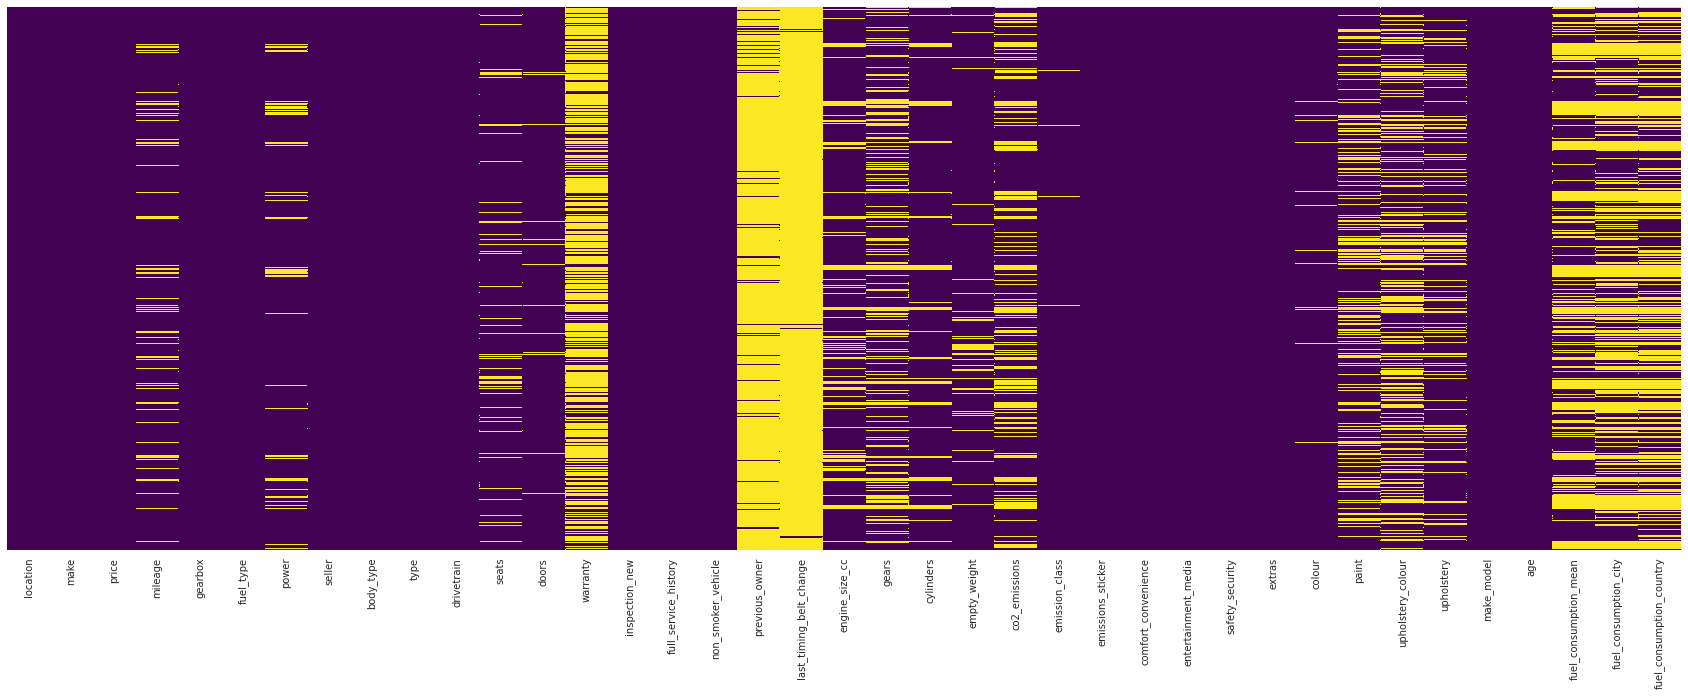

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

## age

In [ ]:
df.age.unique()

array([19.,  9.,  7.,  6.,  5.,  3.,  8., 11., 10., 12.,  4., 13., 17.,
       18., 14., 15.,  1., 20., 16.,  2., 22., 21.,  0., 23., -6., 27.,
       -3., nan, 41., 25., 42., 24., 46., 29., 31., 28., 26.])

Lets check the rows urls having negative ages.

In [ ]:
data.loc[df[df.age<0].index,:][['url']]

,url
2469,https://www.autoscout24.com/offers/audi-a4-avant-1-4-tfsi-trekhaak-leder-gasoline-black-a7d5d863-f38c-489b-a392-718677fac262?source=list_searchresults
5911,https://www.autoscout24.com/offers/audi-q5-50-tfsi-e-299-pk-quattro-s-edition-s-line-trek-electric-gasoline-grey-560aeda1-fa15-4302-8ff6-20fa70faf12f?source=list_searchresults


In [ ]:
# we checked the urls. Lets adjust the anomalies.
df.age = df.age.replace(-6,4).replace(-3,1)

In [ ]:
df.age.value_counts(dropna=False).sort_index()

0.00     1577
1.00     9147
2.00     4683
3.00     3556
4.00     4769
5.00     6199
6.00     5759
7.00     3925
8.00     3190
9.00     3173
10.00    3136
11.00    3145
12.00    2890
13.00    2344
14.00    2370
15.00    2014
16.00    1715
17.00    1646
18.00    1375
19.00    1089
20.00     809
21.00     549
22.00     402
23.00       5
24.00       6
25.00       6
26.00       2
27.00       2
28.00       2
29.00       3
31.00       1
41.00       1
42.00       1
46.00       1
nan        40
Name: age, dtype: int64

Lets check the nan values.

In [ ]:
data.loc[df[df.age.isna()==True].index,['first_registration','type','url']]

,first_registration,type,url
12882,None,"\n,New,\n",https://www.autoscout24.com/offers/bmw-ix-ix-xdrive40-high-executive-electric-blue-c4506cd1-54dc-4e5e-ab2f-540c4cf40baa?source=list_searchresults
13049,None,"\n,New,\n",https://www.autoscout24.com/offers/bmw-ix3-ix3-executive-electric-black-f338c025-32c5-46ef-a136-84503acd29c1?source=list_searchresults
13050,None,"\n,New,\n",https://www.autoscout24.com/offers/bmw-ix3-ix3-executive-electric-beige-7d56fa14-6eb9-427a-a006-29996623264c?source=list_searchresults
13052,None,"\n,New,\n",https://www.autoscout24.com/offers/bmw-ix3-ix3-executive-electric-white-bd97d710-acb2-470a-95d9-5988ea1c42dc?source=list_searchresults
13053,None,"\n,New,\n",https://www.autoscout24.com/offers/bmw-ix3-ix3-executive-electric-red-47e4826f-aecd-4db7-a537-acc7f1dd5495?source=list_searchresults
14856,None,"\n,New,\n",https://www.autoscout24.com/offers/ford-mustang-shelby-super-snake-eu-mustang-supercharged-gasoline-blue-80119ae7-a61b-4941-8269-0ae81f0b6a12?source=list_searchresults
14933,None,"\n,New,\n",https://www.autoscout24.com/offers/ford-f-150-harley-davidson-edition-5-0l-v8-gasoline-white-68039357-8dfa-4c0d-a93f-ae79fdff9971?source=list_searchresults
14936,None,"\n,New,\n",https://www.autoscout24.com/offers/ford-f-150-hennessey-raptor-600-3-5-v6-eb-s-c-gasoline-black-c16612fe-6057-46c2-8a2e-77b92b43d6ea?source=list_searchresults
14940,None,"\n,New,\n",https://www.autoscout24.com/offers/ford-f-150-shelby-f-150-gasoline-black-c2661c50-58de-43aa-8168-e6443b49d087?source=list_searchresults
14941,None,"\n,New,\n",https://www.autoscout24.com/offers/ford-f-150-shelby-f-150-gasoline-white-867e7b4e-8cd1-4bc8-8f09-867d4480b008?source=list_searchresults


All df.age rows with nan values are new cars. So their age is 0.

In [ ]:
df.age = df.age.fillna(0)

In [ ]:
df.age.value_counts(dropna=False).sort_index()

0.00     1617
1.00     9147
2.00     4683
3.00     3556
4.00     4769
5.00     6199
6.00     5759
7.00     3925
8.00     3190
9.00     3173
10.00    3136
11.00    3145
12.00    2890
13.00    2344
14.00    2370
15.00    2014
16.00    1715
17.00    1646
18.00    1375
19.00    1089
20.00     809
21.00     549
22.00     402
23.00       5
24.00       6
25.00       6
26.00       2
27.00       2
28.00       2
29.00       3
31.00       1
41.00       1
42.00       1
46.00       1
Name: age, dtype: int64

Plot df.age and df.mileage relation.

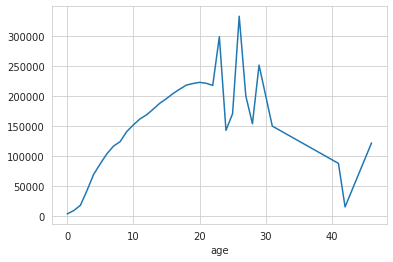

In [ ]:
df.groupby('age').mileage.mean().plot()

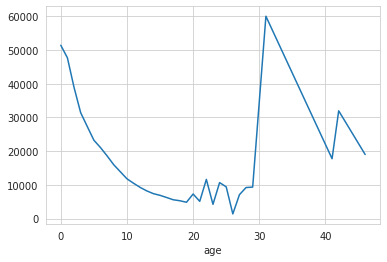

In [ ]:
df.groupby('age').price.mean().plot()

We assign 21 to the cars bigger than 20 old. So the anomaly in the plots is eliminated.

In [ ]:
df.loc[df[df.age>20].index,'age']=21

In [ ]:
df.groupby('age').mileage.mean()

age
0.00      3998.64
1.00      9593.84
2.00     18329.56
3.00     42961.92
4.00     69675.67
5.00     87295.26
6.00    103880.71
7.00    116646.04
8.00    124142.38
9.00    140847.63
10.00   151948.27
11.00   161825.11
12.00   168707.28
13.00   178124.59
14.00   187958.89
15.00   195620.67
16.00   204090.46
17.00   211301.71
18.00   218090.54
19.00   220745.64
20.00   222657.79
21.00   218966.85
Name: mileage, dtype: float64

## mileage

In [ ]:
df.mileage.value_counts(dropna=False).sort_index()

1000.00        48
1001.00        60
1002.00         5
1003.00         3
1004.00         1
             ... 
668451.00       1
686968.00       1
827190.00       1
973379.00       2
nan          6281
Name: mileage, Length: 49344, dtype: int64

In [ ]:
df.groupby('age').mileage.mean()

age
0.00      3998.64
1.00      9593.84
2.00     18329.56
3.00     42961.92
4.00     69675.67
5.00     87295.26
6.00    103880.71
7.00    116646.04
8.00    124142.38
9.00    140847.63
10.00   151948.27
11.00   161825.11
12.00   168707.28
13.00   178124.59
14.00   187958.89
15.00   195620.67
16.00   204090.46
17.00   211301.71
18.00   218090.54
19.00   220745.64
20.00   222657.79
21.00   218966.85
Name: mileage, dtype: float64

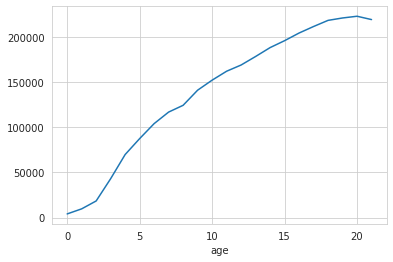

In [ ]:
df.groupby('age').mileage.mean().plot()

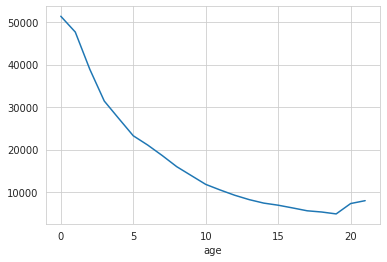

In [ ]:
df.groupby('age').price.mean().plot()

We assign 21 to the cars bigger than 20 old. So the anomaly in the plots is eliminated.

In [ ]:
df.loc[df[df.age>20].index,'age']=21

In [ ]:
df1 = df.groupby('age')['mileage'].mean().to_frame()
df2 = df[df.mileage.isna()==True]['age'].value_counts().sort_index().to_frame()

pd.concat([df1,df2], axis=1).rename(columns={'mileage':'avr_mileage', 
                                             'age':'freq_of_null_mileage_per_age'})

,avr_mileage,freq_of_null_mileage_per_age
0.00,3998.64,1575.00
1.00,9593.84,4381.00
2.00,18329.56,257.00
3.00,42961.92,22.00
4.00,69675.67,6.00
5.00,87295.26,3.00
6.00,103880.71,1.00
7.00,116646.04,4.00
8.00,124142.38,3.00
9.00,140847.63,3.00


In [ ]:
df.mileage.fillna(df.groupby("age").mileage.transform("mean"), inplace=True)

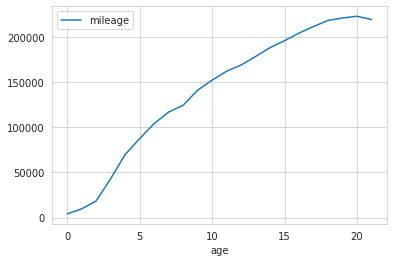

In [ ]:
df.groupby('age')['mileage'].mean().to_frame().plot();

## warranty

In [ ]:
perc_nans(df.warranty)

66.1709716389576

In [ ]:
df.warranty.unique()

array([ 6., nan,  3.,  1., 12., 60., 26., 24., 18., 36., 48.,  2.,  9.,
       10., 84.,  4.])

In [ ]:
df.warranty = df.warranty.astype('float')

In [ ]:
df.warranty.value_counts(dropna=False).sort_index()

1.00       267
2.00         8
3.00      1810
4.00         1
6.00     18502
9.00         2
10.00        1
12.00     1490
18.00       33
24.00     1152
26.00        2
36.00       13
48.00        7
60.00        3
84.00      231
nan      46010
Name: warranty, dtype: int64

In [ ]:
df.groupby(['age', 'warranty']).mileage.describe().sort_index()

count      mean       std       min       25%       50%       75%       max
age   warranty                                                                              
0.00  6.00      221.00   3978.84    217.90   1120.00   3998.64   3998.64   3998.64   3998.64
      12.00      25.00   3567.51    436.08   3020.00   3200.00   3400.00   3998.64   4250.00
      24.00      60.00   3998.64      0.00   3998.64   3998.64   3998.64   3998.64   3998.64
      36.00       1.00   3998.64       nan   3998.64   3998.64   3998.64   3998.64   3998.64
      48.00       1.00   3998.64       nan   3998.64   3998.64   3998.64   3998.64   3998.64
      84.00      36.00   3998.64      0.00   3998.64   3998.64   3998.64   3998.64   3998.64
1.00  1.00        1.00  14849.00       nan  14849.00  14849.00  14849.00  14849.00  14849.00
      3.00       46.00   8936.33   3761.14   1000.00   9593.84   9593.84  10047.71  15143.00
      6.00     2781.00   9943.98   6005.16   1000.00   6500.00   9593.84  10038.00  47644.00
      12.00     515.00  10764.36   7641.25   1000.00   5220.50   9593.84  14531.00  43733.00
      18.00      31.00   7565.45   2936.97   1015.00   6559.00   9208.00   9593.84   9950.00
      24.00     554.00  10081.77   5485.25   1000.00   9262.75   9593.84  10000.00  38921.00
      36.00       7.00   8022.91   2956.58   2131.00   7723.92   9593.84   9593.84   9800.00
      48.00       4.00   9384.17   6270.88   1500.00   7570.38   9593.84  11407.63  16849.00
      60.00       1.00   3050.00       nan   3050.00   3050.00   3050.00   3050.00   3050.00
      84.00     190.00   9549.71    608.30   1209.00   9593.84   9593.84   9593.84   9593.84
2.00  1.00        3.00  38112.67   9438.71  32183.00  32670.50  33158.00  41077.50  48997.00
      2.00        3.00   6350.00   1125.83   5050.00   6025.00   7000.00   7000.00   7000.00
      3.00       30.00  20041.04  11667.92   4898.00  12044.75  17697.28  27470.75  54313.00
      6.00     1927.00  18990.06  12610.31   1000.00   9925.50  17211.00  24968.50  87316.00
      9.00        1.00  21000.00       nan  21000.00  21000.00  21000.00  21000.00  21000.00
      10.00       1.00   9500.00       nan   9500.00   9500.00   9500.00   9500.00   9500.00
      12.00     308.00  19639.93  12645.15   1000.00  10549.00  17915.00  25029.50  88365.00
      18.00       1.00   7950.00       nan   7950.00   7950.00   7950.00   7950.00   7950.00
      24.00     252.00  15945.11  10465.42   1007.00   8226.00  13251.00  20120.25  59436.00
      36.00       1.00  34722.00       nan  34722.00  34722.00  34722.00  34722.00  34722.00
      48.00       1.00  28947.00       nan  28947.00  28947.00  28947.00  28947.00  28947.00
      84.00       3.00  18329.56      0.00  18329.56  18329.56  18329.56  18329.56  18329.56
3.00  1.00       10.00  52214.10  31705.79  13938.00  38852.75  44608.50  57063.00 115841.00
      3.00       50.00  54199.82  41880.48   4589.00  23804.25  43708.50  67277.75 161515.00
      6.00     1583.00  40499.25  23811.49   1015.00  22518.50  35813.00  53400.00 165563.00
      12.00     188.00  41552.92  21313.43   1503.00  26635.75  39750.50  53480.50 132179.00
      24.00      72.00  40721.85  23575.77   5845.00  21478.00  38889.50  52342.00 110511.00
      26.00       1.00  45410.00       nan  45410.00  45410.00  45410.00  45410.00  45410.00
      36.00       2.00  47291.00   1943.13  45917.00  46604.00  47291.00  47978.00  48665.00
      48.00       1.00  48667.00       nan  48667.00  48667.00  48667.00  48667.00  48667.00
4.00  1.00       17.00  62342.47  28822.06  16861.00  42795.00  56925.00  75667.00 124210.00
      3.00      129.00  82498.98  38206.84  10667.00  57552.00  74474.00 112481.00 181746.00
      6.00     2111.00  63967.13  34377.67   1250.00  38608.50  57854.00  82890.00 220410.00
      12.00     139.00  60863.68  32921.31   5135.00  36584.50  52261.00  81806.00 141318.00
      18.00       1.00  85028.00       nan  85028.00  85028.00  85028.00  85028.00  85028.00
      24.00      6

In [ ]:
df.groupby(['warranty', 'make']).mileage.describe()

count      mean       std       min       25%       50%       75%       max
warranty make                                                                                        
1.00     Audi             16.00 136299.56  46501.95  39040.00 110617.50 138920.00 169821.50 203912.00
         BMW              21.00 155861.05 125303.97  15311.00  71166.00 113304.00 173556.00 445900.00
         Chevrolet         1.00 113793.00       nan 113793.00 113793.00 113793.00 113793.00 113793.00
         Citroen           9.00 119889.00  75849.00  20511.00  56640.00 119250.00 143515.00 241211.00
         Dacia             4.00  81961.75  21757.21  56925.00  67158.75  85373.00 100176.00 100176.00
         Fiat              8.00 108934.88  50349.39  15994.00  88548.50 100949.50 158741.00 160934.00
         Ford             14.00 109436.57  66095.52  16861.00  53037.25 106266.00 159543.00 212821.00
         Honda             5.00 163007.40  68480.37  54071.00 171931.00 171931.00 172613.00 244491.00
         Hyundai           9.00  97914.44  54010.57  13938.00  60014.00  98853.00 142432.00 158899.00
         Kia              11.00 103839.36  49951.62  40957.00  67828.00  99164.00 123424.50 206300.00
         Mazda             6.00 100234.67  71488.01  20497.00  52542.00 101682.00 114499.50 222613.00
         Mercedes-Benz    39.00 126385.67  62751.44  14849.00  75667.00 135509.00 169549.50 308641.00
         Opel             14.00 122106.14  38597.47  85065.00  94199.25 105588.50 136514.00 205218.00
         Peugeot          18.00 123185.50  43434.66  46192.00  92364.50 118975.00 157986.50 194462.00
         Renault          17.00 119637.41  45621.81  50093.00  79398.00 124990.00 156892.00 203770.00
         Skoda             3.00 115950.00  49855.75  66626.00  90764.50 114903.00 140612.00 166321.00
         Toyota            5.00 156156.20  38065.24 115137.00 124990.00 152095.00 183823.00 204736.00
         Volkswagen       29.00 148863.66  74860.50  40308.00  98836.00 147275.00 195588.00 321819.00
         Volvo            38.00 200545.63  67642.72  58691.00 156684.25 187087.50 268447.50 328846.00
2.00     Ford              1.00  62157.00       nan  62157.00  62157.00  62157.00  62157.00  62157.00
         Kia               1.00  91736.00       nan  91736.00  91736.00  91736.00  91736.00  91736.00
         Mazda             1.00 181776.00       nan 181776.00 181776.00 181776.00 181776.00 181776.00
         Mercedes-Benz     1.00   5050.00       nan   5050.00   5050.00   5050.00   5050.00   5050.00
         Peugeot           1.00 136364.00       nan 136364.00 136364.00 136364.00 136364.00 136364.00
         Toyota            3.00  28416.67  37094.75   7000.00   7000.00   7000.00  39125.00  71250.00
3.00     Audi            188.00 138679.39  58906.25   9593.84 100524.50 137687.00 163989.25 439576.00
         BMW             270.00 128525.49  58859.54   6195.00  88175.50 125545.50 159128.25 322344.00
         Chevrolet         8.00 159196.12  66340.91  60842.00  97273.75 189263.00 216371.25 217311.00
         Citroen          42.00 120862.62  63356.08   1750.00  90572.50 129110.50 160976.50 262783.00
         Dacia            12.00 109978.50  46666.91  58343.00  85738.50  93585.00 119723.50 197368.00
         Fiat             57.00  69538.54  58899.19   2500.00   9593.84  57611.00 116729.00 243078.00
         Ford             74.00 122781.24  72416.04   1512.00  70674.25 118912.50 173441.25 278931.00
         Honda            11.00 125870.27  41580.06  67729.00  95363.50 119440.00 166238.50 183669.00
         Hyundai          34.00 122055.44  57228.41  16812.00  78259.00 128911.00 150416.75 227266.00
         Kia              33.00 148387.79  55242.31  21065.00 119202.00 152240.00 169035.00 269938.00
         Mazda            50.00 128907.60  75796.54   4898.00  70196.00 118713.50 196407.75 276970.00
         Mercedes-Benz   210.00 131598.40  60025.31  27517.00  82745.25 120007.00 163315.00 357515.00
         Opel             66.00  69267.86  65572

There are too many nan values and when we analyzed these nan values according to the mileage, age and car model columns, we decided that this column does not have healthy data.

In [ ]:
df.drop("warranty", axis=1, inplace=True)

## colour

In [ ]:
df.colour.unique()

array(['Grey', 'White', 'Black', 'Red', 'Silver', 'Brown', 'Blue',
       'Violet', nan, 'Beige', 'Yellow', 'Green', 'Orange', 'Bronze',
       'Gold'], dtype=object)

In [ ]:
df.colour.value_counts(dropna=False).sort_index()

Beige       563
Black     17657
Blue       8650
Bronze       36
Brown      1890
Gold         56
Green       869
Grey      22941
Orange      361
Red        3136
Silver     1812
Violet      165
White      9924
Yellow      288
NaN        1184
Name: colour, dtype: int64

In [ ]:
df.groupby(['colour', 'body_type', 'make_model']).mileage.describe()
# [:1500]

count      mean      std       min       25%       50%       75%       max
colour body_type make_model                                                                                          
Beige  Compact   Audi A3                    1.00 159359.00      nan 159359.00 159359.00 159359.00 159359.00 159359.00
                 BMW 320                    1.00 181141.00      nan 181141.00 181141.00 181141.00 181141.00 181141.00
                 BMW 630                    1.00   9593.84      nan   9593.84   9593.84   9593.84   9593.84   9593.84
                 BMW i3                     2.00  28721.00 30718.13   7000.00  17860.50  28721.00  39581.50  50442.00
                 Citroen C3                 9.00  75578.95 67891.75   1968.00   9593.84  92000.00 120819.00 164549.00
...                                          ...       ...      ...       ...       ...       ...       ...       ...
Yellow Van       Honda Jazz                 2.00  65206.00 34733.09  40646.00  52926.00  65206.00  77486.00  89766.00
                 Fiat 500L                  4.00 139916.25 12644.90 124068.00 134611.50 140478.00 145782.75 154641.00
                 Mercedes-Benz Sprinter     1.00 415995.00      nan 415995.00 415995.00 415995.00 415995.00 415995.00
                 Citroen Grand C4 Picasso   2.00 239852.00 43901.43 208809.00 224330.50 239852.00 255373.50 270895.00
                 Volkswagen Sharan          1.00 131445.00      nan 131445.00 131445.00 131445.00 131445.00 131445.00

[7284 rows x 8 columns]

Fill the null values in "colour" by "ffill" according to "make_model" and "body_type".

In [ ]:
# Grup Sutunlarina(group_col1 ve group_col2) gore gruplayip, uzerinde calisilan sutunun(col_name) null degerlerini "mode" or "median" or "ffill & bfill ile doldurur.
fill(df, "make_model", "body_type", "colour", "ffill") # method can be "mode" or "median" or "ffill"

Number of NaN :  0
------------------
Grey      23263
Black     17916
White     10175
Blue       8809
Red        3224
Brown      1903
Silver     1852
Green       883
Beige       569
Orange      372
Yellow      302
Violet      170
Gold         58
Bronze       36
Name: colour, dtype: int64


## type

In [ ]:
df['type'].value_counts(dropna=False)

Used                 61473
New                   3848
Demonstration         2038
Pre-registered        1101
None                  1071
Antique / Classic        1
Name: type, dtype: int64

In [ ]:
df.groupby(["type", "make_model", "age"]).mileage.describe()[:1500]

count      mean       std       min       25%       50%       75%       max
type              make_model                   age                                                                               
Antique / Classic Mercedes-Benz 560            21.00   1.00  15647.00       nan  15647.00  15647.00  15647.00  15647.00  15647.00
Demonstration     Audi A1                      3.00    1.00  75600.00       nan  75600.00  75600.00  75600.00  75600.00  75600.00
                  Audi A3                      1.00   14.00   5811.29   5026.47   1500.00   2612.50   4450.00   6411.00  17652.00
                                               2.00    3.00  28330.33  15327.75  15281.00  19890.50  24500.00  34855.00  45210.00
                  Audi A4                      1.00    1.00  16000.00       nan  16000.00  16000.00  16000.00  16000.00  16000.00
                                               12.00   1.00 113475.00       nan 113475.00 113475.00 113475.00 113475.00 113475.00
                  Audi A6                      1.00    3.00   6051.33   2701.09   3154.00   4827.00   6500.00   7500.00   8500.00
                  Audi Others                  1.00    1.00   3950.00       nan   3950.00   3950.00   3950.00   3950.00   3950.00
                  Audi Q2                      1.00    3.00   8914.00   7289.88   2500.00   4950.00   7400.00  12121.00  16842.00
                  Audi Q3                      1.00    2.00   8750.00   5303.30   5000.00   6875.00   8750.00  10625.00  12500.00
                  Audi Q5                      1.00    6.00  11706.97   6214.25   4600.00   8023.46  11070.92  13262.00  22500.00
                                               2.00    1.00  12408.00       nan  12408.00  12408.00  12408.00  12408.00  12408.00
                  Audi SQ8                     3.00    1.00  61350.00       nan  61350.00  61350.00  61350.00  61350.00  61350.00
                  Audi e-tron                  2.00    9.00  10895.51  13016.31   1250.00   2500.00   6842.00  10000.00  42500.00
                                               3.00    2.00   7892.50   3489.57   5425.00   6658.75   7892.50   9126.25  10360.00
                                               4.00    1.00  18200.00       nan  18200.00  18200.00  18200.00  18200.00  18200.00
                  Audi e-tron GT               1.00   13.00  12929.83   5412.21   2500.00   9648.00  12500.00  17500.00  20000.00
                  BMW 118                      9.00    1.00 133175.00       nan 133175.00 133175.00 133175.00 133175.00 133175.00
                  BMW 216                      1.00    1.00  13500.00       nan  13500.00  13500.00  13500.00  13500.00  13500.00
                                               2.00    1.00   9500.00       nan   9500.00   9500.00   9500.00   9500.00   9500.00
                  BMW 218                      1.00   31.00   7719.48   3386.32   1013.00   6433.50   7250.00   9324.50  14982.00
                                               2.00    1.00  24647.00       nan  24647.00  24647.00  24647.00  24647.00  24647.00
                  BMW 220                      1.00    2.00   4580.50   4128.80   1661.00   3120.75   4580.50   6040.25   7500.00
                  BMW 225                      1.00    3.00   6999.33   3464.68   4998.00   4999.00   5000.00   8000.00  11000.00
                  BMW 320                      1.00   38.00   8867.11   4602.16   1250.00   6230.50   8127.00  12389.25  20626.00
                  BMW 330                      1.00   20.00   8759.90   6868.00   1250.00   3613.25   6988.50  13844.00  27500.00
                  BMW 418                      2.00    2.00   6999.00      0.00   6999.00   6999.00   6999.00   6999.00   6999.00
                  BMW 420                      2.00    1.00  18329.56       nan  18329.56  18329.56  18329.56  18329.56  18329.56
                  BMW 440                      1.00    3.00   3526.33   3106.88   1013.00   1789.50   2566.00   4783.00   7000.00
                  BMW 52

In [ ]:
df.type.unique()

array(['Used', 'None', 'Demonstration', 'Pre-registered', 'New',
       'Antique / Classic'], dtype=object)

In [ ]:
condition_1 = (df.type=='None') & (df.age==0)
condition_2 = (df.type=='None') & (df.age>30)

df.loc[condition_1,'type'] = df.loc[condition_1,'type'].replace('None','New')
df.loc[condition_2,'type'] = df.loc[condition_2,'type'].replace('None','Antique / Classic')

In [ ]:
df.type = df.type.replace('None',np.nan)

In [ ]:
# Grup Sutunlarina(group_col1 ve group_col2) gore gruplayip, uzerinde calisilan sutunun(col_name) null degerlerini "mode" or "median" or "ffill & bfill ile doldurur.
fill(df, "make_model", "age", "type", "ffill") # method can be "mode" or "median" or "ffill"

Number of NaN :  0
------------------
Used                 62499
New                   3876
Demonstration         2050
Pre-registered        1106
Antique / Classic        1
Name: type, dtype: int64


## body_type

In [ ]:
df['body_type'].value_counts(dropna=False)

Off-Road/Pick-up    19339
Compact             14665
Station wagon       12487
Van                  6882
Sedan                5939
Convertible          3928
Transporter          2499
Coupe                2096
None                 1071
Other                 621
Panel van               2
Flatbed van             2
Car transport           1
Name: body_type, dtype: int64

In [ ]:
df.body_type = df.body_type.replace('None', np.nan).replace("Other", np.nan)

In [ ]:
df['body_type'].value_counts(dropna=False)

Off-Road/Pick-up    19339
Compact             14665
Station wagon       12487
Van                  6882
Sedan                5939
Convertible          3928
Transporter          2499
Coupe                2096
NaN                  1692
Panel van               2
Flatbed van             2
Car transport           1
Name: body_type, dtype: int64

In [ ]:
perc_nans(df.body_type)

2.4334119542081343

In [ ]:
df.groupby(['make_model','body_type']).age.describe()[:1000]

count  mean  std   min   25%   50%   75%   max
make_model                   body_type                                                       
Audi A1                      Compact          211.00  8.58 2.80  1.00  7.00 10.00 11.00 12.00
                             Coupe              1.00 11.00  nan 11.00 11.00 11.00 11.00 11.00
                             Off-Road/Pick-up   4.00  1.00 0.00  1.00  1.00  1.00  1.00  1.00
                             Sedan              1.00 11.00  nan 11.00 11.00 11.00 11.00 11.00
                             Station wagon     18.00 10.44 1.72  5.00 11.00 11.00 11.00 12.00
Audi A2                      Compact            8.00 19.75 1.39 17.00 19.00 20.00 21.00 21.00
                             Van               14.00 20.50 0.76 19.00 20.00 21.00 21.00 21.00
Audi A3                      Compact          823.00  7.37 4.83  0.00  4.00  7.00 10.00 21.00
                             Convertible      140.00  7.72 3.41  2.00  5.00  7.00 11.00 15.00
                             Sedan            272.00  5.95 1.99  1.00  5.00  6.00  7.00 14.00
                             Station wagon     36.00 11.56 2.40  5.00 10.00 12.00 13.00 17.00
Audi A4                      Convertible       81.00 17.14 2.08 13.00 16.00 17.00 19.00 20.00
                             Sedan            246.00 10.83 4.94  1.00  6.00 10.00 14.00 21.00
                             Station wagon    566.00  9.45 5.10  1.00  5.00  9.00 13.00 21.00
Audi A4 allroad              Off-Road/Pick-up   3.00 10.00 2.00  8.00  9.00 10.00 11.00 12.00
                             Station wagon     31.00  7.52 3.26  3.00  5.00  6.00 10.00 13.00
Audi A5                      Compact          134.00  6.71 3.40  1.00  4.00  6.00 10.00 13.00
                             Convertible      170.00  7.55 3.81  0.00  4.00  7.50 11.00 13.00
                             Coupe            102.00 10.09 3.40  1.00  9.00 10.00 13.00 15.00
                             Sedan              2.00  9.00 1.41  8.00  8.50  9.00  9.50 10.00
Audi A6                      Sedan            235.00 10.53 5.18  0.00  7.00 10.00 15.00 19.00
                             Station wagon    385.00  7.89 5.40  0.00  3.00  7.00 12.00 21.00
Audi A6 allroad              Off-Road/Pick-up   5.00 14.60 5.81  8.00  9.00 16.00 20.00 20.00
                             Station wagon     39.00  9.15 4.43  2.00  6.00  8.00 11.50 20.00
Audi A7                      Compact           47.00  6.23 3.57  0.00  3.50  6.00 10.00 11.00
                             Coupe              4.00  9.75 1.26  8.00  9.50 10.00 10.25 11.00
Audi A8                      Sedan            103.00 11.21 6.17  1.00  7.00 11.00 16.50 21.00
Audi Allroad                 Off-Road/Pick-up   2.00 19.00 2.83 17.00 18.00 19.00 20.00 21.00
                             Station wagon      4.00 19.25 1.50 18.00 18.00 19.00 20.25 21.00
Audi Cabriolet               Convertible        5.00 14.60 3.13 12.00 12.00 13.00 18.00 18.00
Audi Others                  Compact            1.00  1.00  nan  1.00  1.00  1.00  1.00  1.00
                             Off-Road/Pick-up  15.00  1.00 0.00  1.00  1.00  1.00  1.00  1.00
                             Station wagon      1.00 20.00  nan 20.00 20.00 20.00 20.00 20.00
                             Transporter        2.00 15.00 0.00 15.00 15.00 15.00 15.00 15.00
                             Van                2.00  1.00 0.00  1.00  1.00  1.00  1.00  1.00
Audi Q2                      Off-Road/Pick-up 239.00  3.60 1.65  0.00  2.00  4.00  5.00  6.00
                             Van                2.00  3.00 0.00  3.00  3.00  3.00  3.00  3.00
Audi Q3                      Off-Road/Pick-up 387.00  4.50 3.46  0.00  1.00  5.00  8.00 11.00
                             Station wagon      3.00  8.33 0.58  8.00  8.00  8.00  8.50  9.00
                             Van                5.00  5.40 3.29  3.00  3.00  3.00  9.00  9.00
Audi Q4 e-tron               Off-Road/Pick-up 122.00  0.59 0.49  0.00  0.00  1.00  1.00  1.00
Audi 

Firstly grouped by make_model and fill body_type by mode.

In [ ]:
df = df.reset_index().drop('index', axis=1)

In [ ]:
# Grup Sutununa(group_col) gore gruplayip, uzerinde calisilan sutunun(col_name) null degerlerini mode ile doldurur.
fill_most(df, "make_model", "body_type") 

Number of NaN :  0
------------------
Off-Road/Pick-up    19593
Compact             15123
Station wagon       12843
Van                  7011
Sedan                6069
Convertible          4000
Transporter          2751
Coupe                2137
Panel van               2
Flatbed van             2
Car transport           1
Name: body_type, dtype: int64


## previous_owner

In [ ]:
df.previous_owner.value_counts(dropna=False,normalize=True)

nan     0.93
1.00    0.04
2.00    0.02
3.00    0.01
4.00    0.00
5.00    0.00
6.00    0.00
7.00    0.00
8.00    0.00
9.00    0.00
10.00   0.00
12.00   0.00
14.00   0.00
Name: previous_owner, dtype: float64

In [ ]:
df.previous_owner.value_counts(dropna=False)

nan      64683
1.00      2956
2.00      1299
3.00       386
4.00       132
5.00        41
6.00        14
7.00         8
8.00         7
9.00         2
10.00        2
12.00        1
14.00        1
Name: previous_owner, dtype: int64

In [ ]:
df[df.previous_owner.isna()==True].groupby('age').make_model.describe()

,count,unique,top,freq
age,,,,
0.00,1563,146,Skoda Enyaq,165
1.00,8815,307,Ford Mustang Mach-E,299
2.00,4443,278,Hyundai Kona,171
3.00,3333,289,Volvo V40,83
4.00,4462,300,Toyota C-HR,168
5.00,5827,313,Volvo V40,182
6.00,5377,307,Volkswagen Passat Variant,216
7.00,3632,301,Audi A3,144
8.00,2932,289,Audi A3,128


the feature has too many missing values. we drop it.

In [ ]:
df = df.drop('previous_owner', axis=1)

##paint

In [ ]:
df.paint.value_counts(dropna=False,normalize=True)

Metallic   0.71
NaN        0.29
Name: paint, dtype: float64

In [ ]:
df.paint.fillna('No Metalic', inplace=True)

## upholstery

In [ ]:
df.upholstery.value_counts(dropna=False,normalize=True)

Cloth          0.37
Full leather   0.27
NaN            0.17
Part leather   0.15
alcantara      0.02
Other          0.01
Velour         0.01
Name: upholstery, dtype: float64

We can combine the types that related with each other

In [ ]:
df.upholstery.replace(["Other","Velour", "alcantara", "Part leather", "Full leather"], [np.nan, "Cloth", "Part/Full Leather", "Part/Full Leather", "Part/Full Leather"], inplace=True)

In [ ]:
df.upholstery.value_counts(dropna=False,normalize=True)

Part/Full Leather   0.44
Cloth               0.38
NaN                 0.18
Name: upholstery, dtype: float64

In [ ]:
fill(df, "make_model", "body_type", "upholstery", "ffill")

Number of NaN :  0
------------------
Part/Full Leather    35829
Cloth                33703
Name: upholstery, dtype: int64


In [ ]:
df.upholstery.value_counts(dropna=False,normalize=True)

Part/Full Leather   0.52
Cloth               0.48
Name: upholstery, dtype: float64

## upholstery_colour

In [ ]:
df.upholstery_colour.value_counts(dropna=False,normalize=True)

Black    0.48
NaN      0.35
Grey     0.09
Beige    0.02
Other    0.02
Brown    0.02
Red      0.00
Blue     0.00
White    0.00
Orange   0.00
Yellow   0.00
Green    0.00
Name: upholstery_colour, dtype: float64

In [ ]:
df.groupby(["make_model", 'upholstery',"upholstery_colour"]).price.describe()

count     mean      std      min      25%      50%      75%       max
make_model upholstery        upholstery_colour                                                                       
Audi A1    Cloth             Black              75.00 15543.79  8125.12  6499.00  9850.00 14185.00 16750.00  49950.00
                             Grey               26.00 13542.62  5692.28  6450.00  9222.50 10650.00 16750.25  26449.00
                             Other               4.00  9860.00  1044.69  8950.00  8983.75  9747.50 10623.75  10995.00
           Part/Full Leather Black              25.00 14376.96  4328.19  6750.00 11500.00 14649.00 15945.00  24995.00
                             Grey                2.00  9220.00  2085.97  7745.00  8482.50  9220.00  9957.50  10695.00
...                                               ...      ...      ...      ...      ...      ...      ...       ...
Volvo XC90 Part/Full Leather Blue                2.00 39190.00  5303.30 35440.00 37315.00 39190.00 41065.00  42940.00
                             Brown              32.00 41040.31 14156.57  9900.00 33945.00 42257.50 49911.25  66900.00
                             Grey                8.00 31473.75 26338.12  8950.00 11550.00 19845.00 46187.50  79900.00
                             Other              15.00 52609.53 25105.82  3950.00 42324.50 45900.00 53924.50 109899.00
                             White               4.00 21660.25 15019.42 12250.00 13150.75 15200.50 23710.00  43990.00

[3216 rows x 8 columns]

In [ ]:
fill(df, "make_model", "upholstery", "upholstery_colour", "ffill")

Number of NaN :  0
------------------
Black     51055
Grey       9981
Beige      2744
Other      2322
Brown      1851
Blue        525
Red         514
White       436
Orange       49
Yellow       37
Green        18
Name: upholstery_colour, dtype: int64


In [ ]:
df.upholstery_colour.value_counts(dropna=False,normalize=True)

Black    0.73
Grey     0.14
Beige    0.04
Other    0.03
Brown    0.03
Blue     0.01
Red      0.01
White    0.01
Orange   0.00
Yellow   0.00
Green    0.00
Name: upholstery_colour, dtype: float64

In [ ]:
df.upholstery_colour.replace(["Green", "Yellow", 'Orange'],'Other', inplace=True)

In [ ]:
df.upholstery_colour.value_counts(dropna=False)

Black    51055
Grey      9981
Beige     2744
Other     2426
Brown     1851
Blue       525
Red        514
White      436
Name: upholstery_colour, dtype: int64

## doors

In [ ]:
df.doors.value_counts(dropna=False,normalize=True)

5.00   0.73
4.00   0.13
2.00   0.08
3.00   0.04
nan    0.02
6.00   0.00
1.00   0.00
Name: doors, dtype: float64

In [ ]:
fill(df, "make_model", "body_type", "doors", "mode")

Number of NaN :  0
------------------
5.00    51437
4.00     9619
2.00     5829
3.00     2549
6.00       94
1.00        4
Name: doors, dtype: int64


## seats

In [ ]:
df.seats.value_counts(dropna=False)

5.00    51860
4.00     6608
nan      5442
2.00     2185
7.00     2025
3.00      992
6.00      290
8.00       64
9.00       63
1.00        3
Name: seats, dtype: int64

In [ ]:
fill(df, "make_model", "body_type", "seats", "mode")

Number of NaN :  0
------------------
5.00    56098
4.00     7129
2.00     2529
7.00     2160
3.00     1179
6.00      301
9.00       67
8.00       66
1.00        3
Name: seats, dtype: int64


In [ ]:
df.seats.value_counts(dropna=False)

5.00    56098
4.00     7129
2.00     2529
7.00     2160
3.00     1179
6.00      301
9.00       67
8.00       66
1.00        3
Name: seats, dtype: int64

## cylinders

In [ ]:
df.cylinders.value_counts(dropna=False)

4.00    46556
3.00     8484
nan      6281
6.00     4661
5.00     1533
8.00     1028
1.00      554
2.00      433
7.00        2
Name: cylinders, dtype: int64

In [ ]:
fill(df, "make_model", "body_type", "cylinders", "median")

Number of NaN :  0
------------------
4.00    48633
3.00     9034
6.00     4739
1.00     3754
5.00     1540
8.00     1107
2.00      708
3.50        8
7.00        4
1.50        4
4.50        1
Name: cylinders, dtype: int64


In [ ]:
df.cylinders.value_counts(dropna=False)

4.00    48633
3.00     9034
6.00     4739
1.00     3754
5.00     1540
8.00     1107
2.00      708
3.50        8
7.00        4
1.50        4
4.50        1
Name: cylinders, dtype: int64

## drivetrain

In [ ]:
df["drivetrain"].value_counts(dropna=False)

Front    37214
None     16160
4WD       8113
Rear      8045
Name: drivetrain, dtype: int64

In [ ]:
df.groupby(["make_model", "body_type", "drivetrain"]).price.describe()[:1500]

count      mean      std       min       25%       50%       75%       max
make_model                   body_type        drivetrain                                                                            
Audi A1                      Compact          Front      165.00  13354.83  5471.93   5950.00   9350.00  12950.00  15945.00  49950.00
                                              None        51.00  11566.76  4569.69   5950.00   8950.00   9800.00  13447.50  31949.00
                             Coupe            Front        1.00  10950.00      nan  10950.00  10950.00  10950.00  10950.00  10950.00
                             Off-Road/Pick-up Front        4.00  36750.00  2186.32  35250.00  35400.00  35900.00  37250.00  39950.00
                             Sedan            None         1.00   8750.00      nan   8750.00   8750.00   8750.00   8750.00   8750.00
                             Station wagon    Front        5.00  10179.80  2889.57   7499.00   8500.00   9450.00  10500.00  14950.00
                                              None        12.00   9251.17  3146.00   5860.00   7412.50   8850.00   9587.50  17650.00
                                              Rear         1.00  11500.00      nan  11500.00  11500.00  11500.00  11500.00  11500.00
Audi A2                      Compact          Front        2.00   3597.50  2612.76   1750.00   2673.75   3597.50   4521.25   5445.00
                                              None         6.00   3173.00  2650.83   1650.00   1822.00   2069.00   2775.00   8500.00
                             Van              Front       13.00   2831.08  1080.14   1475.00   1999.00   2750.00   3495.00   4950.00
                                              None         1.00   3950.00      nan   3950.00   3950.00   3950.00   3950.00   3950.00
Audi A3                      Compact          4WD         22.00  18102.18 11160.97   4950.00  11624.75  16474.50  25361.75  48900.00
                                              Front      645.00  22994.11 13742.17    794.00  12950.00  19900.00  33450.00  55500.00
                                              None       181.00  12764.70  7938.42   1450.00   5950.00  12450.00  17000.00  46850.00
                                              Rear         1.00   9000.00      nan   9000.00   9000.00   9000.00   9000.00   9000.00
                             Convertible      4WD          2.00  35993.50  2836.21  33988.00  34990.75  35993.50  36996.25  37999.00
                                              Front      113.00  22711.09  9590.48   3995.00  12888.00  24750.00  29900.00  42450.00
                                              None        25.00  20274.36  8403.19   8450.00  12995.00  20900.00  25945.00  39950.00
                             Sedan            4WD          6.00  25914.83  6933.70  16950.00  20298.75  26972.00  31887.25  32995.00
                                              Front      210.00  21266.17  6367.08  11500.00  16961.25  19900.00  23400.00  44949.00
                                              None        56.00  18305.75  4031.47   9800.00  15950.00  17797.50  20161.25  29869.00
                             Station wagon    4WD          1.00   7600.00      nan   7600.00   7600.00   7600.00   7600.00   7600.00
                                              Front        7.00   7642.71  1425.87   5750.00   6725.00   7800.00   8550.00   9399.00
                                              None        28.00   8823.61  4395.09   3985.00   6874.25   7997.50   9125.00  27000.00
Audi A4                      Convertible      4WD          7.00  16107.14  5264.30   7650.00  12450.00  18950.00  19650.00  21950.00
                                              Front       55.00   6933.00  3173.58   2900.00   4724.50   6950.00   8575.00  18950.00
                                              None        19.00   7362.58  2671.31   3850.00   5100.00   6885.00   8940.00  14245.00
                             Sedan            4WD         18.00  111

In [ ]:
df.drivetrain = df.drivetrain.replace('None', np.nan)

In [ ]:
df.drivetrain.value_counts(dropna=False)

Front    37214
NaN      16160
4WD       8113
Rear      8045
Name: drivetrain, dtype: int64

In [ ]:
fill(df, "make_model", "body_type", "drivetrain", "mode")

Number of NaN :  0
------------------
Front    49927
Rear     10388
4WD       9217
Name: drivetrain, dtype: int64


## emission_class

In [ ]:
df.emission_class.value_counts(dropna=False)

Euro 6    24872
None      21201
Euro 5    11754
Euro 4     8475
Euro 3     1893
NaN         668
Euro 1      520
Euro 2      149
Name: emission_class, dtype: int64

In [ ]:
df.emission_class.fillna("None", inplace=True)

In [ ]:
df.emission_class.value_counts(dropna=False, normalize=True)

Euro 6   0.36
None     0.31
Euro 5   0.17
Euro 4   0.12
Euro 3   0.03
Euro 1   0.01
Euro 2   0.00
Name: emission_class, dtype: float64

In [ ]:
df.groupby(["make_model", "age", "fuel_type", "emission_class"]).price.describe()

count     mean     std      min      25%      50%      75%      max
make_model age   fuel_type emission_class                                                                     
Audi A1    1.00  Gasoline  Euro 6           6.00 31788.83 9120.77 26449.00 26856.25 27945.00 30949.25 49950.00
                           None             6.00 32746.67 6430.94 24490.00 27555.00 35350.00 36125.00 39950.00
           2.00  Gasoline  Euro 6           2.00 24322.50  951.06 23650.00 23986.25 24322.50 24658.75 24995.00
           3.00  Gasoline  Euro 6           2.00 23422.50  738.93 22900.00 23161.25 23422.50 23683.75 23945.00
           4.00  Diesel    Euro 6           2.00 18400.00  707.11 17900.00 18150.00 18400.00 18650.00 18900.00
...                                          ...      ...     ...      ...      ...      ...      ...      ...
Volvo XC90 19.00 Diesel    None             3.00  7281.67 2306.51  5950.00  5950.00  5950.00  7947.50  9945.00
                 Gasoline  Euro 4          19.00 10256.74 4300.34  3995.00  7474.00  9999.00 12425.00 20950.00
                           None            10.00 10543.00 4675.47  2750.00  8275.00 11347.50 12361.25 17950.00
                 LPG       Euro 4           3.00  6950.00 3041.38  3450.00  5950.00  8450.00  8700.00  8950.00
                           None             1.00 10750.00     nan 10750.00 10750.00 10750.00 10750.00 10750.00

[12976 rows x 8 columns]

In [ ]:
df.emission_class.replace("None", np.nan, inplace=True)

In [ ]:
fill(df, "age", "fuel_type", "emission_class", "ffill")

Number of NaN :  0
------------------
Euro 6    38476
Euro 5    14762
Euro 4    11308
Euro 3     2620
Euro 1     2155
Euro 2      211
Name: emission_class, dtype: int64


## gears

In [ ]:
df.gears.value_counts(dropna=False)

6.00    20769
nan     20257
5.00    11975
7.00     7642
8.00     5430
1.00     1741
9.00      996
4.00      674
2.00       40
3.00        8
Name: gears, dtype: int64

In [ ]:
df.gears.fillna(10, inplace=True)

In [ ]:
df.groupby(['gearbox',"gears"]).price.describe()

count      mean      std      min      25%       50%       75%       max
gearbox   gears                                                                            
Automatic 1.00   1736.00  50075.21 26358.35  2599.00 31895.00  47500.00  62786.00 194990.00
          2.00     37.00  93812.35 47821.21  4999.00 47718.00  86450.00 124900.00 184950.00
          3.00      6.00  17806.33 11782.27  4999.00  8475.00  15699.50  27462.25  32990.00
          4.00    628.00   7139.59  5987.16   995.00  3292.50   5820.00   9442.50  69444.00
          5.00   2013.00  11583.89 32077.96     1.00  5500.00   9450.00  13900.00 999999.00
          6.00   7934.00  22178.38 12585.80   995.00 14486.25  19950.00  26592.25 159500.00
          7.00   7224.00  28737.07 16843.16  1150.00 18450.00  25930.00  34395.00 306894.00
          8.00   5402.00  39816.84 21550.61  5900.00 24944.25  35939.50  47900.00 225950.00
          9.00    987.00  60849.15 31922.51 11940.00 38897.50  56000.00  69924.50 250845.00
          10.00 14650.00  30982.70 26185.78   464.00 14950.00  24845.00  39900.00 999999.00
Manual    1.00      3.00   4666.67  1159.02  3900.00  4000.00   4100.00   5050.00   6000.00
          2.00      3.00  16276.67  4921.40 12950.00 13450.00  13950.00  17940.00  21930.00
          4.00     46.00   2445.46  2476.39   499.00  1216.75   1499.00   2325.00  13350.00
          5.00   9852.00   7199.99  5602.37     1.00  3250.00   5950.00   9950.00 215000.00
          6.00  12653.00  15461.47  8579.29     2.00  9250.00  14750.00  19900.00 129950.00
          7.00     76.00  15648.37  9661.56  1450.00  7675.00  14622.50  22652.50  39950.00
          8.00     13.00  24629.92  9667.92 15950.00 17660.00  20945.00  32900.00  44950.00
          10.00  5471.00   9264.22  8248.61   440.00  3950.00   7450.00  12750.00 279950.00
None      1.00      2.00  59950.00     0.00 59950.00 59950.00  59950.00  59950.00  59950.00
          3.00      2.00   1150.00     0.00  1150.00  1150.00   1150.00   1150.00   1150.00
          5.00    110.00  11062.33  4428.31  2400.00  8412.50  11222.50  13887.50  26950.00
          6.00    182.00  21668.19  9302.85  2600.00 15108.75  20970.00  27447.50  54875.00
          7.00    342.00  32148.75 16306.41  3399.00 22422.50  29878.50  38933.75 144950.00
          8.00     15.00  48919.13 35725.63  9250.00 30425.00  47999.00  50969.50 169500.00
          9.00      9.00 137836.67 76507.80 54995.00 93950.00 102500.00 221500.00 249900.00
          10.00   136.00  12340.43 17931.81   950.00  3786.75   6250.00  15912.50 168500.00

In [ ]:
df[(df.gears<4)&(df.gearbox!='Automatic')][['make_model','gearbox',"gears"]]

,make_model,gearbox,gears
26840,Opel Vivaro,Manual,2.00
27860,Volkswagen Golf,Manual,2.00
32466,Volkswagen Golf Plus,Manual,1.00
35382,Renault Megane,Manual,1.00
39383,Renault Laguna,Manual,1.00
42215,Chevrolet None,None,1.00
42218,Chevrolet None,None,1.00
48452,Hyundai i20,Manual,2.00
59901,Skoda Fabia,None,3.00
59904,Skoda Fabia,None,3.00


In [ ]:
indexes = df[(df.gears<4)&(df.gearbox!='Automatic')][['make_model','gearbox',"gears"]].index
df.loc[indexes,['gearbox','gears']] = np.nan

In [ ]:
df.gears.replace(10, np.nan, inplace=True)
df.gearbox.replace('None', np.nan, inplace=True)

In [ ]:
df.gears.value_counts(dropna=False)

6.00    20769
nan     20267
5.00    11975
7.00     7642
8.00     5430
1.00     1736
9.00      996
4.00      674
2.00       37
3.00        6
Name: gears, dtype: int64

In [ ]:
fill(df, "make_model", "body_type", "gears", "mode")

Number of NaN :  0
------------------
6.00    29528
5.00    16327
7.00     9714
8.00     7433
1.00     4513
9.00     1269
4.00      705
2.00       37
3.00        6
Name: gears, dtype: int64


## gearbox

In [ ]:
df.gearbox.value_counts(dropna=False)

Automatic    40617
Manual       28111
NaN            804
Name: gearbox, dtype: int64

In [ ]:
df.gearbox.fillna('None', inplace=True)

In [ ]:
df.groupby(["make_model", "body_type",'gearbox']).price.describe()

count     mean      std      min      25%      50%      75%      max
make_model body_type        gearbox                                                                        
Audi A1    Compact          Automatic  94.00 14648.33  4844.56  8250.00 12462.25 14425.00 15949.75 49950.00
                            Manual    117.00 11291.59  4948.63  5950.00  8450.00  9440.00 13900.00 27950.00
                            None        5.00 19078.60  8292.92 10995.00 12999.00 17950.00 21500.00 31949.00
           Coupe            Automatic   1.00 10950.00      nan 10950.00 10950.00 10950.00 10950.00 10950.00
           Off-Road/Pick-up Manual      4.00 36750.00  2186.32 35250.00 35400.00 35900.00 37250.00 39950.00
...                                      ...      ...      ...      ...      ...      ...      ...      ...
Volvo XC90 Station wagon    Automatic   1.00  5450.00      nan  5450.00  5450.00  5450.00  5450.00  5450.00
           Transporter      Automatic  11.00 14509.09 10022.10  5950.00  7750.00 10250.00 18450.00 37900.00
                            Manual      2.00  9250.00     0.00  9250.00  9250.00  9250.00  9250.00  9250.00
           Van              Automatic  12.00 11742.42  9081.32  5350.00  5896.25  8500.00 12275.00 36595.00
                            Manual      4.00  6734.25  2966.04  4000.00  4337.50  6475.00  8871.75  9987.00

[2565 rows x 8 columns]

In [ ]:
df.gearbox.replace('None', np.nan, inplace=True)

In [ ]:
fill(df, "make_model", "body_type", "gearbox", "mode")

Number of NaN :  0
------------------
Automatic    41188
Manual       28344
Name: gearbox, dtype: int64


## power

In [ ]:
perc_nans(df.power)

8.624805844790888

In [ ]:
df.power.value_counts(dropna=False).sort_index()

1.00         2
3.00         1
10.00        1
12.00        1
14.00        1
15.00        5
16.00        1
18.00        1
22.00        1
24.00        1
30.00        1
33.00        1
38.00        2
44.00        3
45.00       54
48.00        1
50.00        1
52.00       12
54.00       16
56.00        1
57.00        3
58.00       45
60.00      224
61.00        7
63.00       21
64.00       14
65.00       78
67.00      189
68.00      269
69.00      752
71.00       16
72.00       54
73.00      173
75.00      957
76.00        8
77.00      101
79.00        7
80.00      293
82.00      763
83.00      121
84.00      151
86.00      736
87.00       79
88.00      225
90.00     1771
91.00       67
92.00      140
94.00       45
95.00      549
97.00      329
98.00      161
99.00      421
101.00    1397
102.00     504
103.00     136
105.00    1428
106.00      31
107.00     131
109.00     898
110.00    1332
111.00    1287
113.00     106
114.00     247
116.00    2314
117.00      23
118.00     253
120.00    

In [ ]:
df[df.power<51].groupby(["make_model", "body_type"]).price.describe()

count      mean     std       min       25%       50%       75%       max
make_model                body_type                                                                                  
Audi A3                   Compact            1.00   6950.00     nan   6950.00   6950.00   6950.00   6950.00   6950.00
Audi A4                   Station wagon      1.00  16500.00     nan  16500.00  16500.00  16500.00  16500.00  16500.00
BMW i3                    Compact            2.00  18219.00  326.68  17988.00  18103.50  18219.00  18334.50  18450.00
                          Sedan              1.00  19500.00     nan  19500.00  19500.00  19500.00  19500.00  19500.00
Dacia Spring              Compact           54.00  19510.72 1135.77  17845.00  18486.25  19485.00  20348.75  21635.00
Fiat 500e                 Compact            1.00  29440.00     nan  29440.00  29440.00  29440.00  29440.00  29440.00
Ford Puma                 Off-Road/Pick-up   1.00  24495.00     nan  24495.00  24495.00  24495.00  24495.00  24495.00
Hyundai Ioniq             Compact            1.00  25930.00     nan  25930.00  25930.00  25930.00  25930.00  25930.00
Hyundai Kona              Off-Road/Pick-up   2.00  29962.50 5610.89  25995.00  27978.75  29962.50  31946.25  33930.00
Kia Stonic                Off-Road/Pick-up   1.00  24445.00     nan  24445.00  24445.00  24445.00  24445.00  24445.00
Mercedes-Benz GLE 450     Off-Road/Pick-up   1.00 102995.00     nan 102995.00 102995.00 102995.00 102995.00 102995.00
Opel Corsa                Compact            4.00  32864.75 2953.47  28450.00  32734.00  34162.00  34292.75  34685.00
Opel Mokka                Off-Road/Pick-up   1.00  35846.00     nan  35846.00  35846.00  35846.00  35846.00  35846.00
Renault Twizy             Compact            1.00  15950.00     nan  15950.00  15950.00  15950.00  15950.00  15950.00
Toyota Auris              Compact            1.00  11900.00     nan  11900.00  11900.00  11900.00  11900.00  11900.00
                          Station wagon      1.00  15900.00     nan  15900.00  15900.00  15900.00  15900.00  15900.00
Volkswagen Lupo           Compact            1.00    899.00     nan    899.00    899.00    899.00    899.00    899.00
Volkswagen Passat Variant Station wagon      1.00  37900.00     nan  37900.00  37900.00  37900.00  37900.00  37900.00
Volkswagen XL1            Coupe              1.00 104800.00     nan 104800.00 104800.00 104800.00 104800.00 104800.00
Volvo XC40                Off-Road/Pick-up   1.00  61950.00     nan  61950.00  61950.00  61950.00  61950.00  61950.00

In [ ]:
indexes = df[df.power<51].index
df.loc[indexes,'power']=np.nan

In [ ]:
df.power.describe()

count   63457.00
mean      157.36
std        74.53
min        52.00
25%       111.00
50%       140.00
75%       179.00
max       843.00
Name: power, dtype: float64

In [ ]:
fill(df, "make_model", "body_type", "power", "median")

Number of NaN :  0
------------------
150.00    4515
120.00    2855
136.00    2679
122.00    2564
116.00    2419
204.00    2218
140.00    1892
131.00    1849
90.00     1839
170.00    1577
101.00    1489
110.00    1453
105.00    1431
141.00    1414
111.00    1289
125.00    1180
190.00    1146
156.00    1118
184.00    1105
165.00    1049
163.00    1025
160.00     988
109.00     968
75.00      957
179.00     843
82.00      819
126.00     802
69.00      777
86.00      741
177.00     737
143.00     735
224.00     720
135.00     695
218.00     673
211.00     622
145.00     564
95.00      561
99.00      553
258.00     541
200.00     537
245.00     505
102.00     504
231.00     384
286.00     372
192.00     359
118.00     359
306.00     353
320.00     350
97.00      337
152.00     315
80.00      298
155.00     280
68.00      271
252.00     270
147.00     264
272.00     263
129.00     259
88.00      253
114.00     252
181.00     240
313.00     231
60.00      227
154.00     213
340.00     209
13

## engine_size_cc


In [ ]:
df.engine_size_cc.value_counts(dropna=False)

nan        11257
1598.00     4818
1998.00     2923
1199.00     2487
1395.00     2336
1798.00     2242
1995.00     2153
1969.00     2126
1984.00     2071
1498.00     1765
1390.00     1681
1997.00     1672
1197.00     1561
1968.00     1420
1499.00     1310
1595.00     1281
1591.00     1137
1560.00      986
1461.00      965
1991.00      946
1796.00      770
1999.00      752
1596.00      722
2143.00      619
1332.00      593
2993.00      586
2967.00      583
1364.00      549
1580.00      542
1496.00      478
1242.00      472
2435.00      458
2979.00      445
1587.00      408
2987.00      369
1396.00      358
1368.00      343
1198.00      337
2400.00      324
2996.00      301
1330.00      299
1248.00      299
2521.00      290
1477.00      256
2488.00      245
2497.00      237
1149.00      229
2995.00      215
1497.00      209
2494.00      198
3498.00      192
1360.00      191
2198.00      186
1339.00      184
1397.00      182
1398.00      182
1618.00      180
1794.00      177
1987.00      1

In [ ]:
df.engine_size_cc.fillna("-", inplace=True)

In [ ]:
df.groupby(["make_model", "body_type","engine_size_cc"]).price.describe()

count     mean     std      min      25%      50%      75%      max
make_model body_type engine_size_cc                                                                     
Audi A1    Compact   1197.00         59.00  8787.24 1805.03  5950.00  7800.00  8950.00  9485.00 14450.00
                     1390.00         76.00 12360.18 2588.84  6950.00 10262.25 12774.50 14238.75 16890.00
                     1395.00         15.00 16993.93 3015.42 12450.00 14947.50 16445.00 17650.00 22950.00
                     1398.00          1.00 10695.00     nan 10695.00 10695.00 10695.00 10695.00 10695.00
                     1422.00          8.00 15167.38 3011.25  9800.00 13912.25 15450.00 17217.50 18900.00
...                                    ...      ...     ...      ...      ...      ...      ...      ...
Volvo XC90 Van       2400.00          3.00 10283.00 1940.65  8500.00  9249.50  9999.00 11174.50 12350.00
                     2401.00          1.00  5350.00     nan  5350.00  5350.00  5350.00  5350.00  5350.00
                     2521.00          5.00  7087.40 2687.31  4000.00  4450.00  8500.00  8500.00  9987.00
                     2922.00          4.00  6353.75 1098.85  5735.00  5735.00  5842.50  6461.25  7995.00
                     4414.00          2.00 17100.00 6858.94 12250.00 14675.00 17100.00 19525.00 21950.00

[5092 rows x 8 columns]

In [ ]:
df.engine_size_cc.replace("-", np.nan, inplace=True)

In [ ]:
fill(df, "make_model", "body_type", "engine_size_cc", "median")

Number of NaN :  0
------------------
1598.00    8825
1998.00    2954
1199.00    2893
1498.00    2587
1395.00    2540
1798.00    2258
1995.00    2196
1969.00    2143
1984.00    2083
1197.00    1845
1390.00    1819
1997.00    1696
1591.00    1509
1968.00    1440
1499.00    1330
1595.00    1314
1461.00    1147
1242.00    1104
1560.00    1030
1596.00    1025
1991.00     959
1796.00     778
1580.00     778
1999.00     754
2143.00     679
1248.00     651
1332.00     612
1000.00     601
2993.00     593
2967.00     588
1368.00     580
1364.00     574
1496.00     479
2435.00     458
2979.00     446
1587.00     427
1149.00     392
1396.00     385
2987.00     371
1330.00     368
1198.00     359
1482.00     340
3000.00     333
2400.00     325
2996.00     302
2521.00     290
1477.00     282
1399.00     271
1398.00     268
1229.00     251
1339.50     247
2488.00     245
2497.00     241
1497.00     227
2995.00     220
2494.00     198
3498.00     194
1360.00     192
2198.00     187
1339.00     185
13

## empty_weight

In [ ]:
df.empty_weight.value_counts(dropna=False)

nan        4888
1295.00    1689
1405.00    1259
1635.00     877
1065.00     735
1515.00     723
1180.00     718
1395.00     683
1400.00     542
1430.00     529
1265.00     518
1335.00     502
1275.00     474
1280.00     455
1245.00     424
1270.00     414
1325.00     402
1385.00     384
1355.00     376
1290.00     371
1250.00     369
1365.00     364
1285.00     359
1390.00     358
1345.00     357
1660.00     345
1745.00     345
1240.00     340
1712.00     336
1455.00     327
1170.00     323
1505.00     319
1310.00     313
1485.00     312
1470.00     308
1445.00     308
1380.00     302
1375.00     298
1255.00     293
1125.00     274
1294.00     271
1465.00     269
1475.00     269
1370.00     264
1177.00     263
1360.00     260
1495.00     249
1715.00     247
1060.00     247
2050.00     245
1130.00     233
1410.00     232
1975.00     231
1175.00     229
1480.00     226
1050.00     225
1220.00     223
1260.00     222
1155.00     219
1499.00     219
1153.00     217
1425.00     211
1740.00 

In [ ]:
df.empty_weight.fillna("-", inplace=True)

In [ ]:
df.groupby(["make_model", "body_type","empty_weight"]).price.describe()

count     mean     std      min      25%      50%      75%      max
make_model body_type empty_weight                                                                     
Audi A1    Compact   1010.00        2.00 13947.50 1410.68 12950.00 13448.75 13947.50 14446.25 14945.00
                     1015.00       44.00  8321.55 1386.57  5950.00  7470.00  8625.00  8999.00 11990.00
                     1025.00        1.00 12950.00     nan 12950.00 12950.00 12950.00 12950.00 12950.00
                     1035.00       10.00 15742.90 1442.46 13900.00 14483.00 15472.50 16900.00 17940.00
                     1040.00       13.00 11216.23 2843.51  7950.00  8999.00  9750.00 14449.00 15980.00
...                                  ...      ...     ...      ...      ...      ...      ...      ...
Volvo XC90 Van       2077.00        1.00 12250.00     nan 12250.00 12250.00 12250.00 12250.00 12250.00
                     2083.00        1.00 21950.00     nan 21950.00 21950.00 21950.00 21950.00 21950.00
                     2085.00        1.00  5350.00     nan  5350.00  5350.00  5350.00  5350.00  5350.00
                     2170.00        1.00  7995.00     nan  7995.00  7995.00  7995.00  7995.00  7995.00
                     2180.00        1.00 36595.00     nan 36595.00 36595.00 36595.00 36595.00 36595.00

[12830 rows x 8 columns]

In [ ]:
df.empty_weight.replace("-", np.nan, inplace=True)

In [ ]:
fill(df, "make_model", "body_type", "empty_weight", "median")

Number of NaN :  0
------------------
1295.00    1763
1065.00    1360
1405.00    1296
1395.00    1095
1635.00     885
1265.00     857
1515.00     735
1180.00     722
1390.00     594
1400.00     549
1430.00     534
1335.00     516
1275.00     494
1280.00     458
1245.00     446
1060.00     440
1270.00     418
1325.00     406
1050.00     402
1385.00     392
1250.00     388
1355.00     383
1290.00     377
1365.00     372
1285.00     363
1345.00     362
1000.00     358
1712.00     351
1240.00     350
1745.00     347
1660.00     347
1170.00     336
1455.00     331
1505.00     323
1485.00     320
1310.00     318
1445.00     315
1470.00     313
1380.00     308
1375.00     299
1255.00     297
1135.00     296
1465.00     289
1475.00     282
1370.00     281
1125.00     280
1294.00     276
1410.00     271
1055.00     271
1360.00     270
1495.00     270
1177.00     263
2050.00     252
1715.00     247
1392.00     238
1975.00     235
1130.00     234
1740.00     234
1175.00     229
1480.00     226
12

## co2_emission

In [ ]:
df.co2_emissions.value_counts(dropna=False)

nan       18577
0.00       5547
139.00     1190
149.00     1011
119.00      994
125.00      758
109.00      698
159.00      676
120.00      653
124.00      652
129.00      638
134.00      620
99.00       613
114.00      609
110.00      588
155.00      564
154.00      559
140.00      533
115.00      507
105.00      492
127.00      488
137.00      486
152.00      471
138.00      462
117.00      452
130.00      450
136.00      449
131.00      447
104.00      439
88.00       438
103.00      435
169.00      419
179.00      404
95.00       397
128.00      397
135.00      396
132.00      395
190.00      393
143.00      388
112.00      387
82.00       386
116.00      380
123.00      379
113.00      375
174.00      374
118.00      365
156.00      353
167.00      346
147.00      342
106.00      340
145.00      337
199.00      329
108.00      327
178.00      324
157.00      323
158.00      323
144.00      318
153.00      306
133.00      305
126.00      302
177.00      301
122.00      300
175.00  

In [ ]:
df.co2_emissions.fillna("-", inplace=True)

In [ ]:
df.groupby(["make_model", "body_type","co2_emissions"]).price.describe()

count     mean      std      min      25%      50%      75%      max
make_model body_type co2_emissions                                                                      
Audi A1    Compact   0.0             7.00 12181.57  2658.11  6999.00 11467.00 12500.00 13947.00 14944.00
                     91.0            1.00  9800.00      nan  9800.00  9800.00  9800.00  9800.00  9800.00
                     94.0            1.00 14500.00      nan 14500.00 14500.00 14500.00 14500.00 14500.00
                     97.0           10.00 15163.80  1976.01 12449.00 13312.50 15199.50 16662.50 17900.00
                     98.0            6.00 15638.33  1524.42 13900.00 14686.25 15220.00 16586.25 17940.00
...                                   ...      ...      ...      ...      ...      ...      ...      ...
Volvo XC90 Van       273.0           1.00  4000.00      nan  4000.00  4000.00  4000.00  4000.00  4000.00
                     280.0           1.00  8500.00      nan  8500.00  8500.00  8500.00  8500.00  8500.00
                     304.0           3.00  5806.67   124.13  5735.00  5735.00  5735.00  5842.50  5950.00
                     322.0           2.00 17100.00  6858.94 12250.00 14675.00 17100.00 19525.00 21950.00
                     -               2.00 22295.00 20223.25  7995.00 15145.00 22295.00 29445.00 36595.00

[12627 rows x 8 columns]

In [ ]:
df.co2_emissions.replace("-", np.nan, inplace=True)

In [ ]:
fill(df, "make_model", "body_type", "co2_emissions", "median")

Number of NaN :  0
------------------
0.00      5874
133.00    4341
139.00    1486
149.00    1434
119.00    1233
110.00     964
120.00     959
116.00     959
99.00      945
115.00     926
124.00     888
105.00     877
129.00     868
125.00     836
159.00     820
109.00     797
134.00     762
154.00     712
88.00      701
155.00     691
114.00     676
152.00     674
103.00     624
108.00     622
140.00     613
143.00     597
117.00     595
136.00     571
137.00     568
144.00     567
130.00     566
127.00     561
131.00     557
104.00     538
158.00     523
113.00     523
138.00     517
106.00     517
118.00     511
147.00     506
135.00     499
102.00     490
169.00     473
174.00     473
179.00     470
156.00     469
122.00     461
112.00     459
123.00     446
95.00      443
153.00     440
190.00     429
132.00     425
178.00     425
199.00     417
128.00     416
167.00     395
82.00      386
142.00     371
121.00     370
157.00     367
145.00     348
162.00     344
126.00     341
17

## save

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/AutoScout24/data_backup3.csv')
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AutoScout24/data_backup3.csv')



# 3-Outlier Analysis

##paint

In [ ]:
df.paint.value_counts(dropna=False,normalize=True)

##paint

In [ ]:
df.paint.value_counts(dropna=False,normalize=True)